___
# Project-08: Space Server
___

In [1]:
# importing project dependencies:

# compute dependency
import numpy as np
# dataframe dependency
import pandas as pd
# visualization dependencies
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.express as px
# stats dependency
from scipy import stats
# feature_engineering dependency
import feature_engine
# from scraping some data
import webbrowser


import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing the dataset
df = pd.read_csv('Space_Server.csv')

In [3]:
# creating 2 copies of the same dataset
df_clean = df.copy()                                # for modelling

In [4]:
df.drop(df.columns[0],1,inplace=True)

In [5]:
df.head()

objid          ra       dec         u         g         r         i  \
0  1.237650e+18  183.531326  0.089693  19.47406  17.04240  15.94699  15.50342   
1  1.237650e+18  183.598370  0.135285  18.66280  17.21449  16.67637  16.48922   
2  1.237650e+18  183.680207  0.126185  19.38298  18.19169  17.47428  17.08732   
3  1.237650e+18  183.870529  0.049911  17.76536  16.60272  16.16116  15.98233   
4  1.237650e+18  183.883288  0.102557  17.55025  16.26342  16.43869  16.55492   

          z  run  rerun  camcol  field     specobjid   class  redshift  plate  \
0  15.22531  752    301       4    267  3.722360e+18    STAR -0.000009   3306   
1  16.39150  752    301       4    267  3.638140e+17    STAR -0.000055    323   
2  16.80125  752    301       4    268  3.232740e+17  GALAXY  0.123111    287   
3  15.90438  752    301       4    269  3.722370e+18    STAR -0.000111   3306   
4  16.61326  752    301       4    269  3.722370e+18    STAR  0.000590   3306   

     mjd  fiberid  
0  54922      491  
1  51615      541  
2  52023      513  
3  54922      510  
4  54922      512

In [6]:
# chape of the data
df.shape

(10000, 18)

In [7]:
# info on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [8]:
# description of the dataset
df.describe()

objid            ra           dec             u             g  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000  10000.000000   
mean   1.237650e+18    175.529987     14.836148     18.619355     17.371931   
std    1.577039e+05     47.783439     25.212207      0.828656      0.945457   
min    1.237650e+18      8.235100     -5.382632     12.988970     12.799550   
25%    1.237650e+18    157.370946     -0.539035     18.178035     16.815100   
50%    1.237650e+18    180.394514      0.404166     18.853095     17.495135   
75%    1.237650e+18    201.547279     35.649397     19.259232     18.010145   
max    1.237650e+18    260.884382     68.542265     19.599900     19.918970   

                  r             i             z           run    rerun  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.0   
mean      16.840963     16.583579     16.422833    981.034800    301.0   
std        1.067764      1.141805      1.203188    273.305024      0.0   
min       12.431600     11.947210     11.610410    308.000000    301.0   
25%       16.173333     15.853705     15.618285    752.000000    301.0   
50%       16.858770     16.554985     16.389945    756.000000    301.0   
75%       17.512675     17.258550     17.141447   1331.000000    301.0   
max       24.802040     28.179630     22.833060   1412.000000    301.0   

             camcol         field     specobjid      redshift         plate  \
count  10000.000000  10000.000000  1.000000e+04  10000.000000  10000.000000   
mean       3.648700    302.380100  1.645022e+18      0.143726   1460.986400   
std        1.666183    162.577763  2.013998e+18      0.388774   1788.778371   
min        1.000000     11.000000  2.995780e+17     -0.004136    266.000000   
25%        2.000000    184.000000  3.389248e+17      0.000081    301.000000   
50%        4.000000    299.000000  4.966580e+17      0.042591    441.000000   
75%        5.000000    414.000000  2.881300e+18      0.092579   2559.000000   
max        6.000000    768.000000  9.468830e+18      5.353854   8410.000000   

                mjd       fiberid  
count  10000.000000  10000.000000  
mean   52943.533300    353.069400  
std     1511.150651    206.298149  
min    51578.000000      1.000000  
25%    51900.000000    186.750000  
50%    51997.000000    351.000000  
75%    54468.000000    510.000000  
max    57481.000000   1000.000000

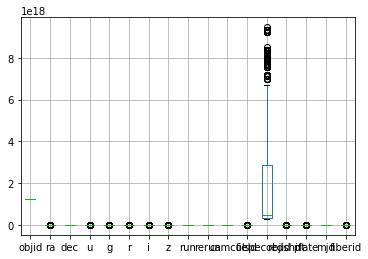

In [9]:
df.boxplot()

In [10]:
# check for the missing values in the dataset

In [11]:
df.isna().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

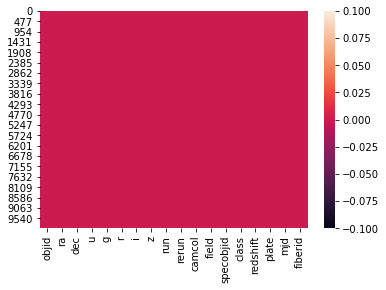

In [12]:
sns.heatmap(df.isnull())

* Lukily we have no missing values in the dataset,yet.

In [13]:
# check for correlation between the features.
df.corr()

objid            ra           dec             u  \
objid      1.000000e+00  2.525328e-14 -1.937483e-15  6.025573e-14   
ra         2.525328e-14  1.000000e+00  3.596046e-03  3.123756e-02   
dec       -1.937483e-15  3.596046e-03  1.000000e+00  3.527932e-02   
u          6.025573e-14  3.123756e-02  3.527932e-02  1.000000e+00   
g          1.001982e-13  4.390863e-02  6.187471e-02  8.492320e-01   
r          2.997581e-14  4.710290e-02  6.340395e-02  6.923790e-01   
i          2.216117e-14  4.573107e-02  5.829189e-02  6.026302e-01   
z         -3.809573e-14  4.294957e-02  5.687030e-02  5.514828e-01   
run       -1.553011e-14 -9.274056e-02  7.783849e-01  3.822910e-02   
rerun               NaN           NaN           NaN           NaN   
camcol     1.921887e-15 -6.293831e-03  1.146139e-01  9.944672e-03   
field      5.938881e-16  5.946996e-01 -1.314714e-01  8.547880e-03   
specobjid -1.829075e-15 -9.532711e-02  8.834533e-02 -1.294293e-01   
redshift   4.994733e-16  3.030740e-02  6.702076e-02  1.637409e-01   
plate      4.156934e-16 -9.532933e-02  8.834153e-02 -1.294304e-01   
mjd       -3.317582e-15 -8.688726e-02  6.614663e-02 -1.687927e-01   
fiberid    4.665195e-15  5.748482e-02  1.550124e-01  1.130112e-02   

                      g             r             i             z  \
objid      1.001982e-13  2.997581e-14  2.216117e-14 -3.809573e-14   
ra         4.390863e-02  4.710290e-02  4.573107e-02  4.294957e-02   
dec        6.187471e-02  6.340395e-02  5.829189e-02  5.687030e-02   
u          8.492320e-01  6.923790e-01  6.026302e-01  5.514828e-01   
g          1.000000e+00  9.581062e-01  9.074187e-01  8.796222e-01   
r          9.581062e-01  1.000000e+00  9.776718e-01  9.691967e-01   
i          9.074187e-01  9.776718e-01  1.000000e+00  9.815066e-01   
z          8.796222e-01  9.691967e-01  9.815066e-01  1.000000e+00   
run        5.844630e-02  5.726060e-02  4.976478e-02  4.825225e-02   
rerun               NaN           NaN           NaN           NaN   
camcol     1.022304e-02  1.074725e-02  1.346079e-02  1.092981e-02   
field      1.465110e-02  1.713294e-02  1.978147e-02  1.824845e-02   
specobjid -5.497908e-02  1.978831e-02  7.295994e-02  1.123981e-01   
redshift   4.075763e-01  4.410797e-01  4.314500e-01  4.240342e-01   
plate     -5.498078e-02  1.978671e-02  7.295843e-02  1.123969e-01   
mjd       -9.277155e-02 -9.344506e-03  5.089616e-02  9.565845e-02   
fiberid    4.718739e-02  6.108141e-02  6.997739e-02  6.797999e-02   

                    run  rerun        camcol         field     specobjid  \
objid     -1.553011e-14    NaN  1.921887e-15  5.938881e-16 -1.829075e-15   
ra        -9.274056e-02    NaN -6.293831e-03  5.946996e-01 -9.532711e-02   
dec        7.783849e-01    NaN  1.146139e-01 -1.314714e-01  8.834533e-02   
u          3.822910e-02    NaN  9.944672e-03  8.547880e-03 -1.294293e-01   
g          5.844630e-02    NaN  1.022304e-02  1.465110e-02 -5.497908e-02   
r          5.726060e-02    NaN  1.074725e-02  1.713294e-02  1.978831e-02   
i          4.976478e-02    NaN  1.346079e-02  1.978147e-02  7.295994e-02   
z          4.825225e-02    NaN  1.092981e-02  1.824845e-02  1.123981e-01   
run        1.000000e+00    NaN  1.518143e-01 -4.638975e-01  9.360436e-02   
rerun               NaN    NaN           NaN           NaN           NaN   
camcol     1.518143e-01    NaN  1.000000e+00 -6.792055e-02  4.080943e-02   
field     -4.638975e-01    NaN -6.792055e-02  1.000000e+00 -9.372375e-02   
specobjid  9.360436e-02    NaN  4.080943e-02 -9.372375e-02  1.000000e+00   
redshift   5.905595e-02    NaN  6.833537e-03  1.541360e-02 -3.808992e-02   
plate      9.360107e-02    NaN  4.079461e-02 -9.372323e-02  1.000000e+00   
mjd        7.035433e-02    NaN  2.628396e-02 -8.655805e-02  9.668799e-01   
fiberid    1.385659e-01    NaN  5.356292e-01 -4.049295e-02  2.298375e-01   

               redshift         plate           mjd       fiberid  
objid      4.994733e-16  4.156934e-16 -3.317582e-15  4.665195e-15  
ra         3.030740e-02 -9.

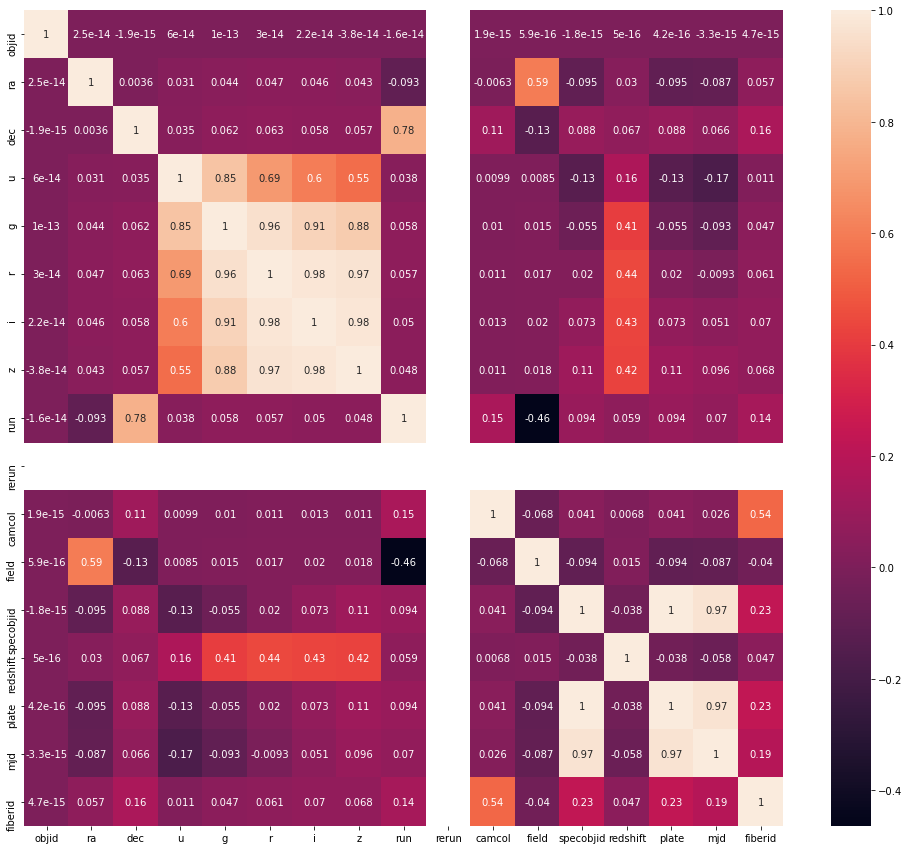

In [14]:
plt.figure(figsize=(17,15))
sns.heatmap(df.corr(),annot=True)

In [15]:
df.head()

objid          ra       dec         u         g         r         i  \
0  1.237650e+18  183.531326  0.089693  19.47406  17.04240  15.94699  15.50342   
1  1.237650e+18  183.598370  0.135285  18.66280  17.21449  16.67637  16.48922   
2  1.237650e+18  183.680207  0.126185  19.38298  18.19169  17.47428  17.08732   
3  1.237650e+18  183.870529  0.049911  17.76536  16.60272  16.16116  15.98233   
4  1.237650e+18  183.883288  0.102557  17.55025  16.26342  16.43869  16.55492   

          z  run  rerun  camcol  field     specobjid   class  redshift  plate  \
0  15.22531  752    301       4    267  3.722360e+18    STAR -0.000009   3306   
1  16.39150  752    301       4    267  3.638140e+17    STAR -0.000055    323   
2  16.80125  752    301       4    268  3.232740e+17  GALAXY  0.123111    287   
3  15.90438  752    301       4    269  3.722370e+18    STAR -0.000111   3306   
4  16.61326  752    301       4    269  3.722370e+18    STAR  0.000590   3306   

     mjd  fiberid  
0  54922      491  
1  51615      541  
2  52023      513  
3  54922      510  
4  54922      512

In [16]:
df.run.value_counts()

756     3060
752     2086
1345     915
1350     540
1140     527
745      453
1035     396
1412     347
1302     246
1331     245
1231     245
1334     212
1239     197
1336     182
1404     137
1045     112
1402      49
308       31
1411      10
1356       4
727        4
1119       1
1332       1
Name: run, dtype: int64

* Heads Up on some columns:
    1. objid is the object indentifier, and has a single value thoughout the table -> Redundant Column
    2. Similary, spaceobj is also an identifier -> Redundant Column
    3. Run, rerun, camcol and field are features which describe a field within an image taken by the SDSS. A field is basically a part of the entire image corresponding to 2048 by 1489 pixels. These features are realted to the camera/telescope scanning systems which do not contribute to classifying the target. -> Redundant Columns
    4. Again, fibreid is the ID is the Fiber Identification number  -> Redundant Column
    5. plate is the plate number of the telescope -> Redundant Column
    6. Mjd is the Modified Julian Date on which the image was taken. -> Redundant Column

In [17]:
# Let's drop those columns
df.drop(['objid', 'specobjid', 'run', 'rerun', 'camcol', 'plate', 'mjd', 'fiberid', 'field'], axis=1, inplace=True)

In [18]:
df.head()

ra       dec         u         g         r         i         z  \
0  183.531326  0.089693  19.47406  17.04240  15.94699  15.50342  15.22531   
1  183.598370  0.135285  18.66280  17.21449  16.67637  16.48922  16.39150   
2  183.680207  0.126185  19.38298  18.19169  17.47428  17.08732  16.80125   
3  183.870529  0.049911  17.76536  16.60272  16.16116  15.98233  15.90438   
4  183.883288  0.102557  17.55025  16.26342  16.43869  16.55492  16.61326   

    class  redshift  
0    STAR -0.000009  
1    STAR -0.000055  
2  GALAXY  0.123111  
3    STAR -0.000111  
4    STAR  0.000590

* Class is our dependent variable (target) and rest of the features .

## Univariate Anaysis

In [19]:
# helper function
def fig_this_size(x,y):
    return plt.figure(figsize=(x,y))

In [20]:
# ra

* Right ascension (abbreviated RA) is the angular distance measured eastward along the celestial equator from the Sun at the March equinox to the hour circle of the point above the earth in question. 

In [21]:
df.ra.value_counts()

226.511352    1
239.195497    1
203.080070    1
244.284910    1
228.767177    1
             ..
186.748348    1
200.194332    1
149.338567    1
238.370735    1
150.593198    1
Name: ra, Length: 10000, dtype: int64

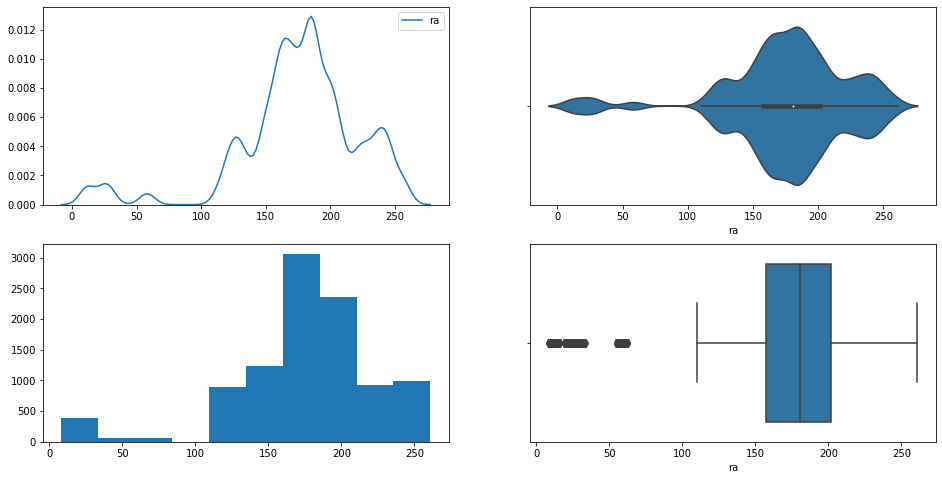

In [22]:
fig = fig_this_size(16,8)

fig.add_subplot(221)
sns.kdeplot(df.ra)

fig.add_subplot(222)
sns.violinplot(df.ra,orient='h')

fig.add_subplot(223)
plt.hist(df.ra)

fig.add_subplot(224)
sns.boxplot(df.ra)

* In some observations the ra distance is to short, and will be considered as an outliers for the dataset. 

In [23]:
print('Total values that have ra less than 100:',len(df[df.ra < 100]))

Total values that have ra less than 100: 508


In [24]:
print('Percentage:',len(df[df.ra < 100])/len(df) * 100)

Percentage: 5.08


* There are only around 500 (about 5 percent) values having the Right Ascension below 500.Removing them will be better for modelling the dataset.

In [25]:
# dec (declination)

* Declination, in the angular distance of a body north or south of the celestial equator.

* <b>Declination and right ascension, an east-west coordinate, together define the position of an object in the sky.Declination, in astronomy, the angular distance of a body north or south of the celestial equator. Declination and right ascension, an east-west coordinate, together define the position of an object in the sky.</b>

In [26]:
df.dec.value_counts()

-1.741589     1
 1.055437     1
-0.727881     1
-0.589612     1
 1.127497     1
             ..
-1.500945     1
-0.258964     1
 14.677468    1
 61.610971    1
 0.661888     1
Name: dec, Length: 10000, dtype: int64

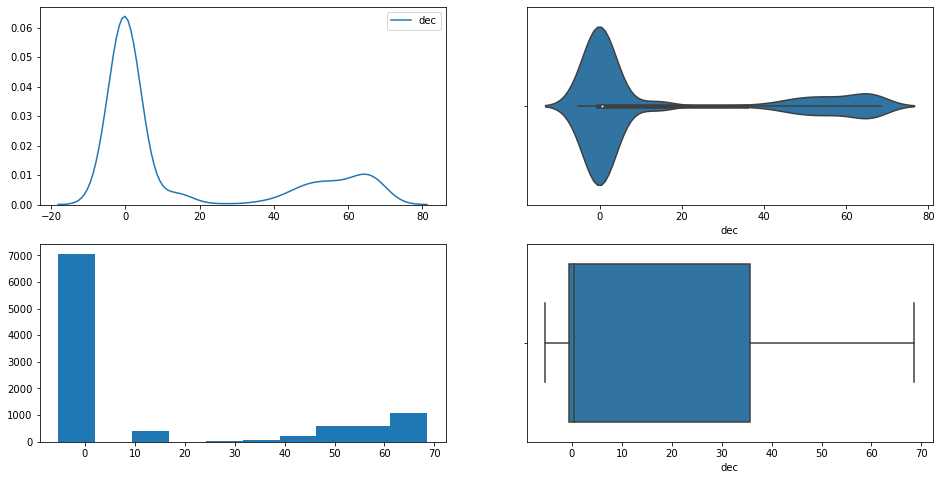

In [27]:
fig = fig_this_size(16,8)

fig.add_subplot(221)
sns.kdeplot(df.dec)

fig.add_subplot(222)
sns.violinplot(df.dec,orient='h')

fig.add_subplot(223)
plt.hist(df.dec)

fig.add_subplot(224)
sns.boxplot(df.dec)

* We can observe that , declination is clasified into 2 parts.

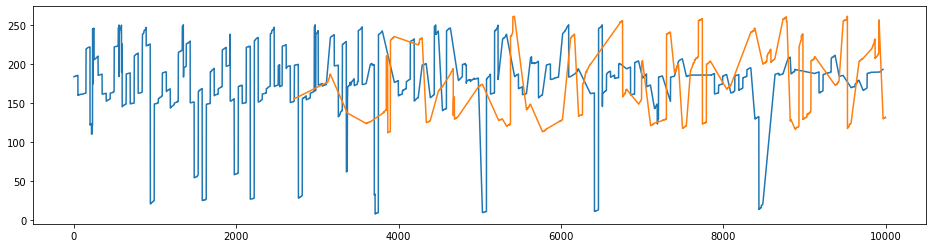

In [28]:
fig = fig_this_size(16,4)

df[df.dec < 20]['ra'].plot()

df[df.dec > 20]['ra'].plot()


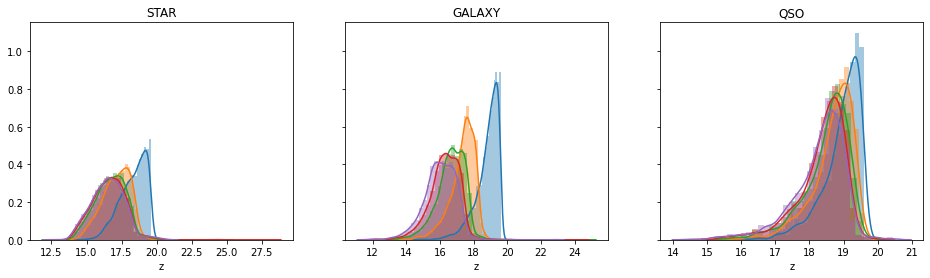

In [29]:
fig,ax = plt.subplots(1,3,figsize=(16,4),sharey=True)  
for i,classs in enumerate(df['class'].unique()):

    for col in ['u','g','r','i','z']:
    
        sns.distplot(df[df['class'] == classs][col],ax=ax[i])
    
    ax[i].title.set_text(classs)

plt.show()

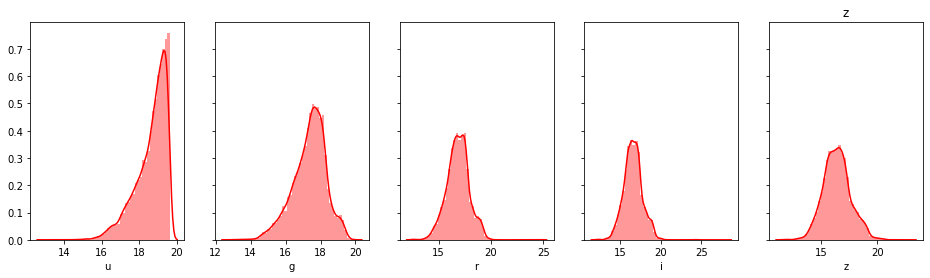

In [30]:
fig,ax = plt.subplots(1,5,figsize=(16,4),sharey=True)
for i,col in enumerate(['u','g','r','i','z']):
    sns.distplot(df[col],ax=ax[i],color='r')
    plt.title(col)

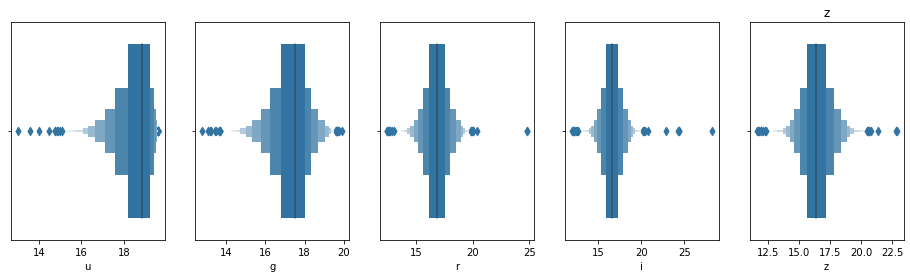

In [31]:
fig,ax = plt.subplots(1,5,figsize=(16,4),sharey=True)
for i,col in enumerate(['u','g','r','i','z']):
    sns.boxenplot(df[col],ax=ax[i])
    plt.title(col)

In [32]:
# redshift

*  Redshift happens when light or other electromagnetic radiation from an object is increased in wavelength, or shifted to the red end of the spectrum.
* Redshift, displacement of the spectrum of an astronomical object toward longer (red) wavelengths.

In [33]:
df.redshift.value_counts()

 0.000000    19
-0.000020     6
-0.000062     5
-0.000073     4
 0.000063     4
             ..
 0.070092     1
 0.257290     1
-0.000125     1
 0.076354     1
 1.368632     1
Name: redshift, Length: 9637, dtype: int64

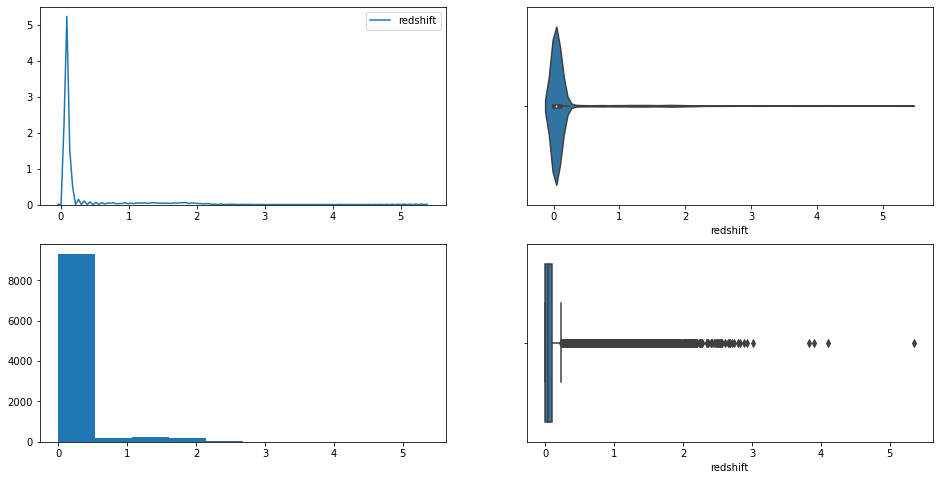

In [34]:
fig = fig_this_size(16,8)

fig.add_subplot(221)
sns.kdeplot(df.redshift)

fig.add_subplot(222)
sns.violinplot(df.redshift,orient='h')

fig.add_subplot(223)
plt.hist(df.redshift)

fig.add_subplot(224)
sns.boxplot(df.redshift)

In [35]:
# classes

In [36]:
df

ra        dec         u         g         r         i         z  \
0     183.531326   0.089693  19.47406  17.04240  15.94699  15.50342  15.22531   
1     183.598370   0.135285  18.66280  17.21449  16.67637  16.48922  16.39150   
2     183.680207   0.126185  19.38298  18.19169  17.47428  17.08732  16.80125   
3     183.870529   0.049911  17.76536  16.60272  16.16116  15.98233  15.90438   
4     183.883288   0.102557  17.55025  16.26342  16.43869  16.55492  16.61326   
...          ...        ...       ...       ...       ...       ...       ...   
9995  131.316413  51.539547  18.81777  17.47053  16.91508  16.68305  16.50570   
9996  131.306083  51.671341  18.27255  17.43849  17.07692  16.71661  16.69897   
9997  131.552562  51.666986  18.75818  17.77784  17.51872  17.43302  17.42048   
9998  131.477151  51.753068  18.88287  17.91068  17.53152  17.36284  17.13988   
9999  131.665012  51.805307  19.27586  17.37829  16.30542  15.83548  15.50588   

       class  redshift  
0       STAR -0.000009  
1       STAR -0.000055  
2     GALAXY  0.123111  
3       STAR -0.000111  
4       STAR  0.000590  
...      ...       ...  
9995  GALAXY  0.027583  
9996  GALAXY  0.117772  
9997    STAR -0.000402  
9998  GALAXY  0.014019  
9999  GALAXY  0.118417  

[10000 rows x 9 columns]

* This is the target variable.

In [37]:
df['class']

0         STAR
1         STAR
2       GALAXY
3         STAR
4         STAR
         ...  
9995    GALAXY
9996    GALAXY
9997      STAR
9998    GALAXY
9999    GALAXY
Name: class, Length: 10000, dtype: object

In [38]:
df['class'].value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

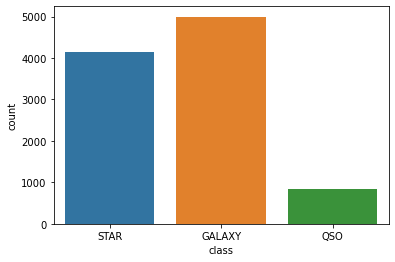

In [39]:
sns.countplot(df['class'])

* We have 3 classes to predict from.
* 2 Out of 3 classes are well balanced.
* We have to predict if the celestial body is a star,a galaxy or a Quastar.

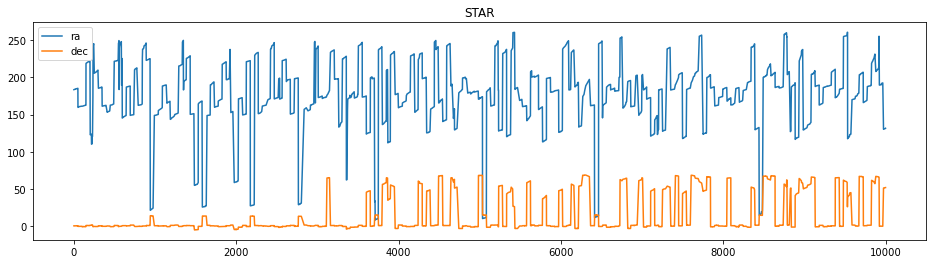

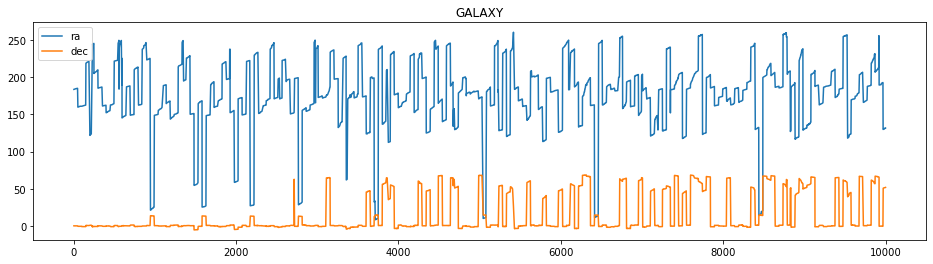

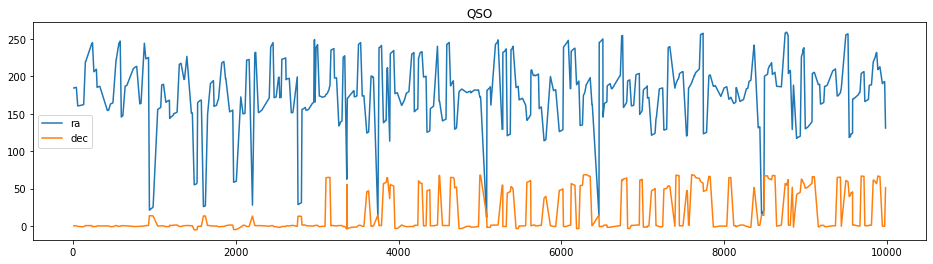

In [40]:
for classs in df['class'].unique():  

    df[df['class'] == classs][['ra','dec']].plot(figsize=(16,4))
    plt.title(classs)
    plt.show()

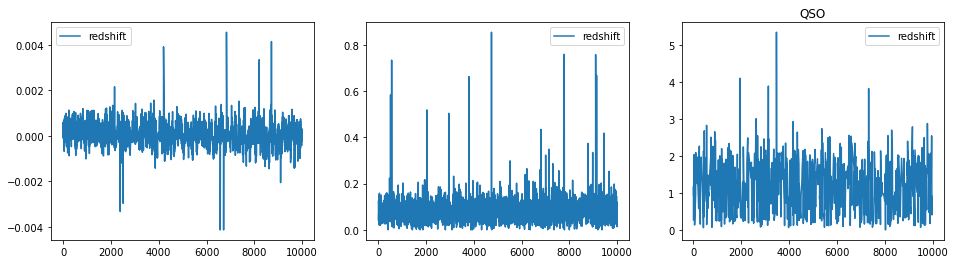

In [41]:
fig,ax = plt.subplots(1,3,figsize=(16,4))
for i,classs in enumerate(df['class'].unique()):

    df[df['class'] == classs][['redshift']].plot(ax=ax[i])
    plt.title(classs)

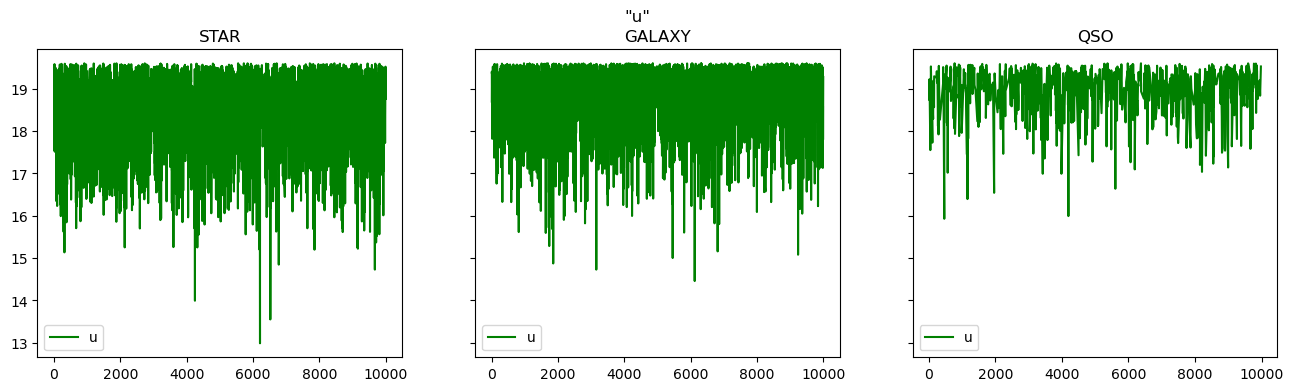

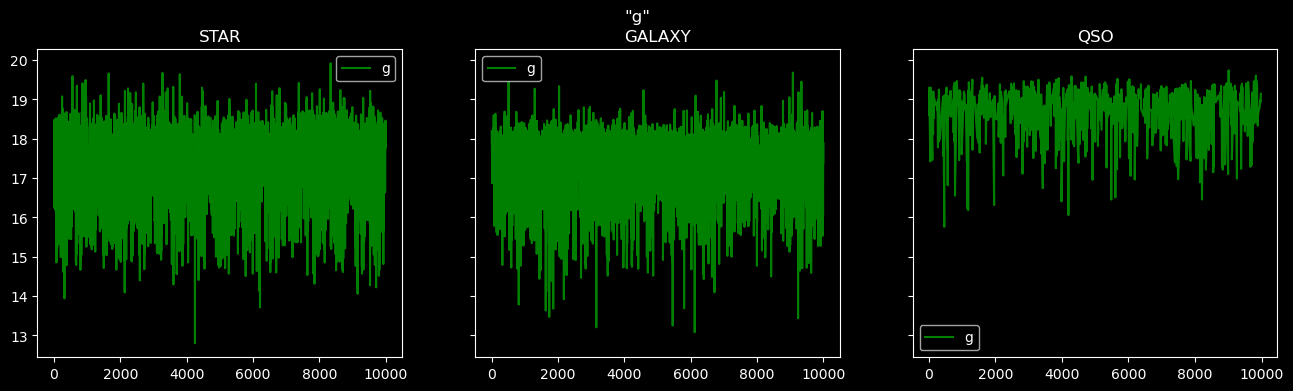

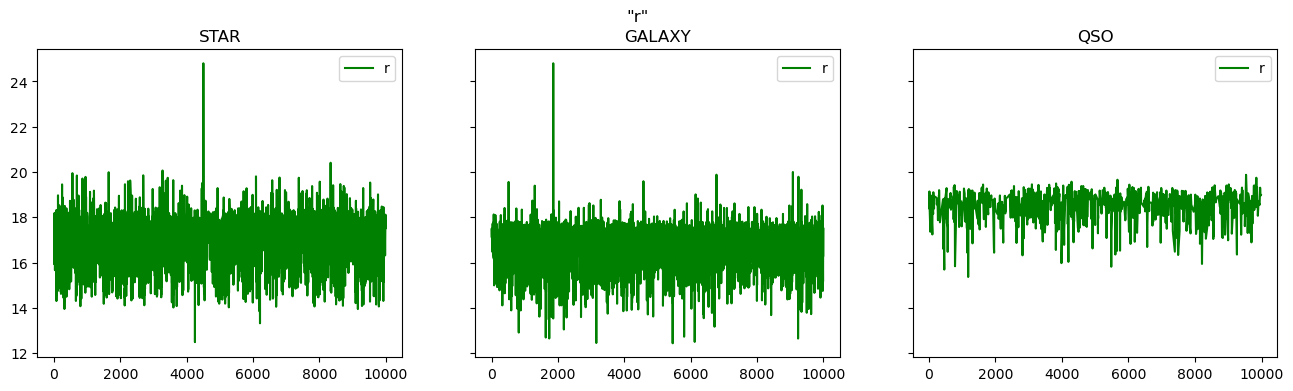

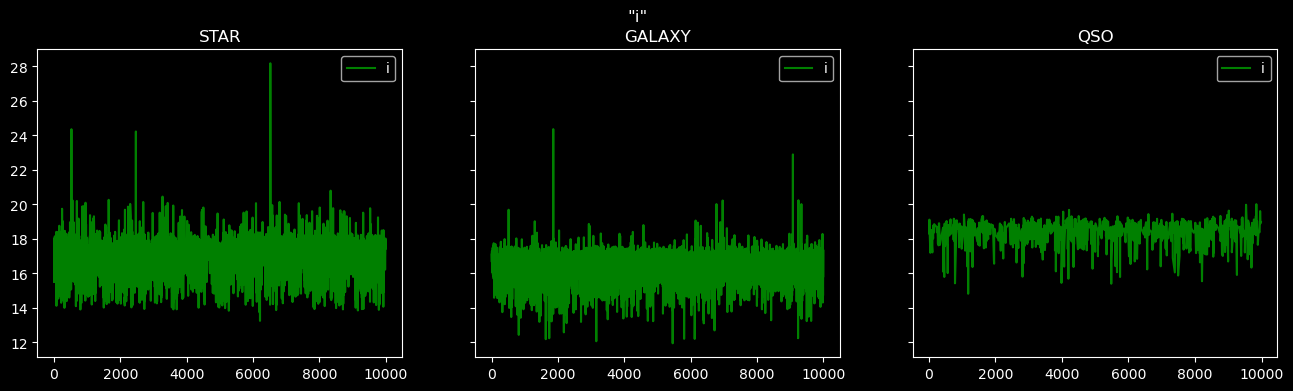

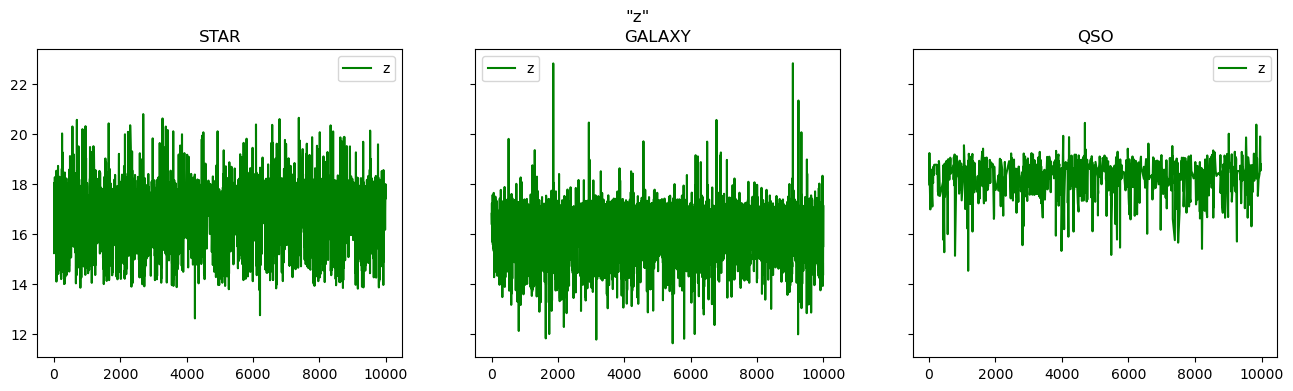

In [42]:
# u g r i z with restpect to classes of the target variable.

for n,feature in enumerate(['u','g','r','i','z']):
    
    if n%2 == 0:
        plt.style.use('default')
    
    fig,ax = plt.subplots(1,3,figsize=(16,4),sharey=True)
    fig.suptitle('"{}"'.format(feature))
    for i,classs in enumerate(df['class'].unique()):
  
        df[df['class'] == classs][[feature]].plot(ax=ax[i],color='g')
        ax[i].title.set_text(classs)
    plt.style.use('dark_background')
plt.style.use('default')

## Multivariate Analysis.

In [43]:
# ra vs dec

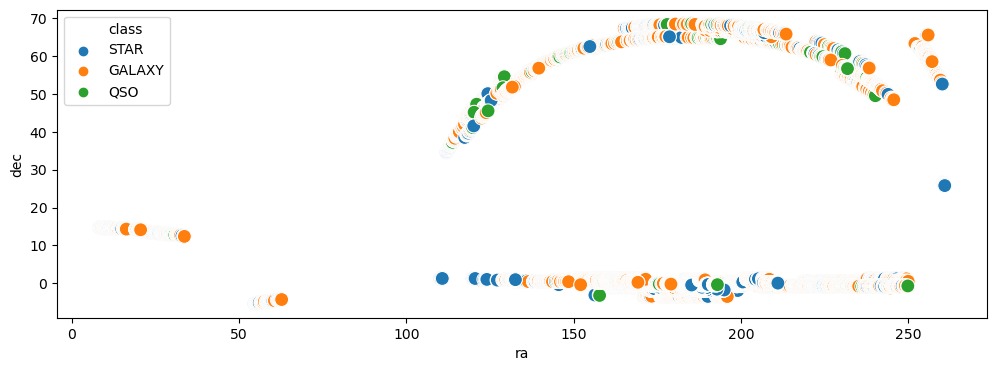

In [44]:
fig_this_size(12,4)

sns.scatterplot(df.ra,df.dec,s=100,hue=df['class'],palette='tab10')

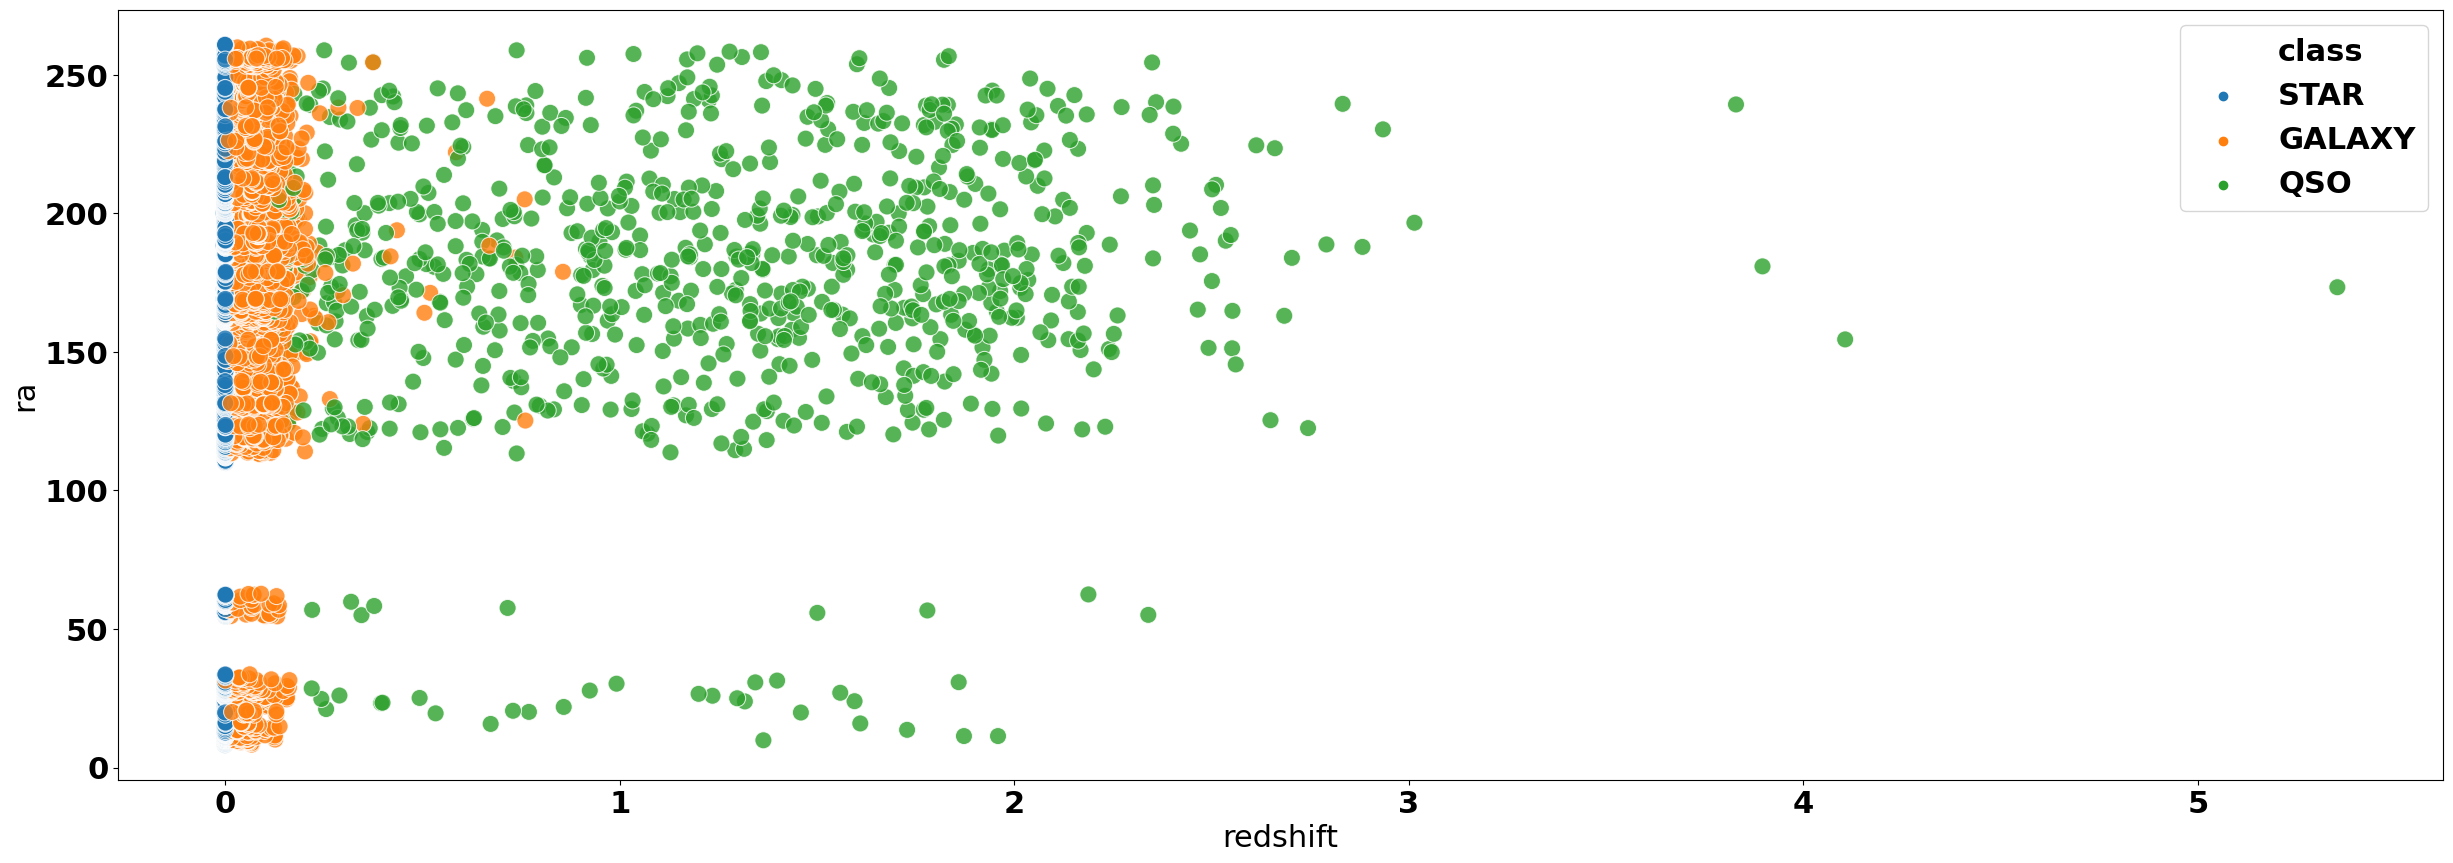

In [45]:
font = {'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

fig_this_size(30,10)
sns.scatterplot(df.redshift,df.ra,hue=df['class'],s=150,alpha=0.8)

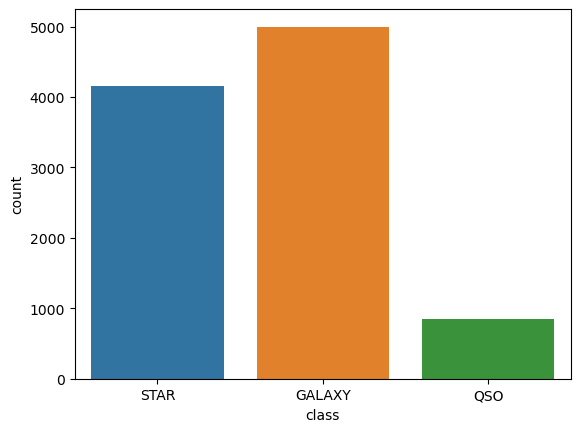

In [46]:
plt.rcdefaults()
sns.countplot(df['class'])

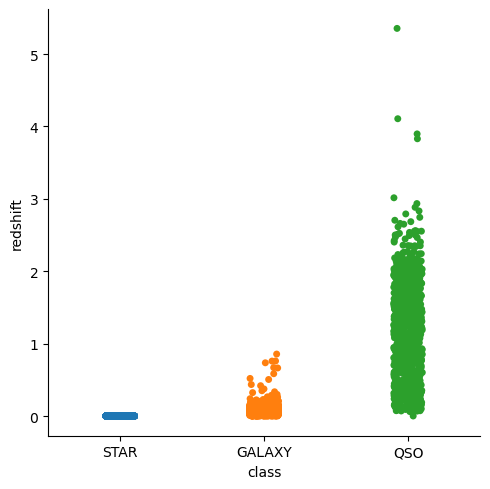

In [47]:
sns.catplot(x = 'class',y = 'redshift',data = df)

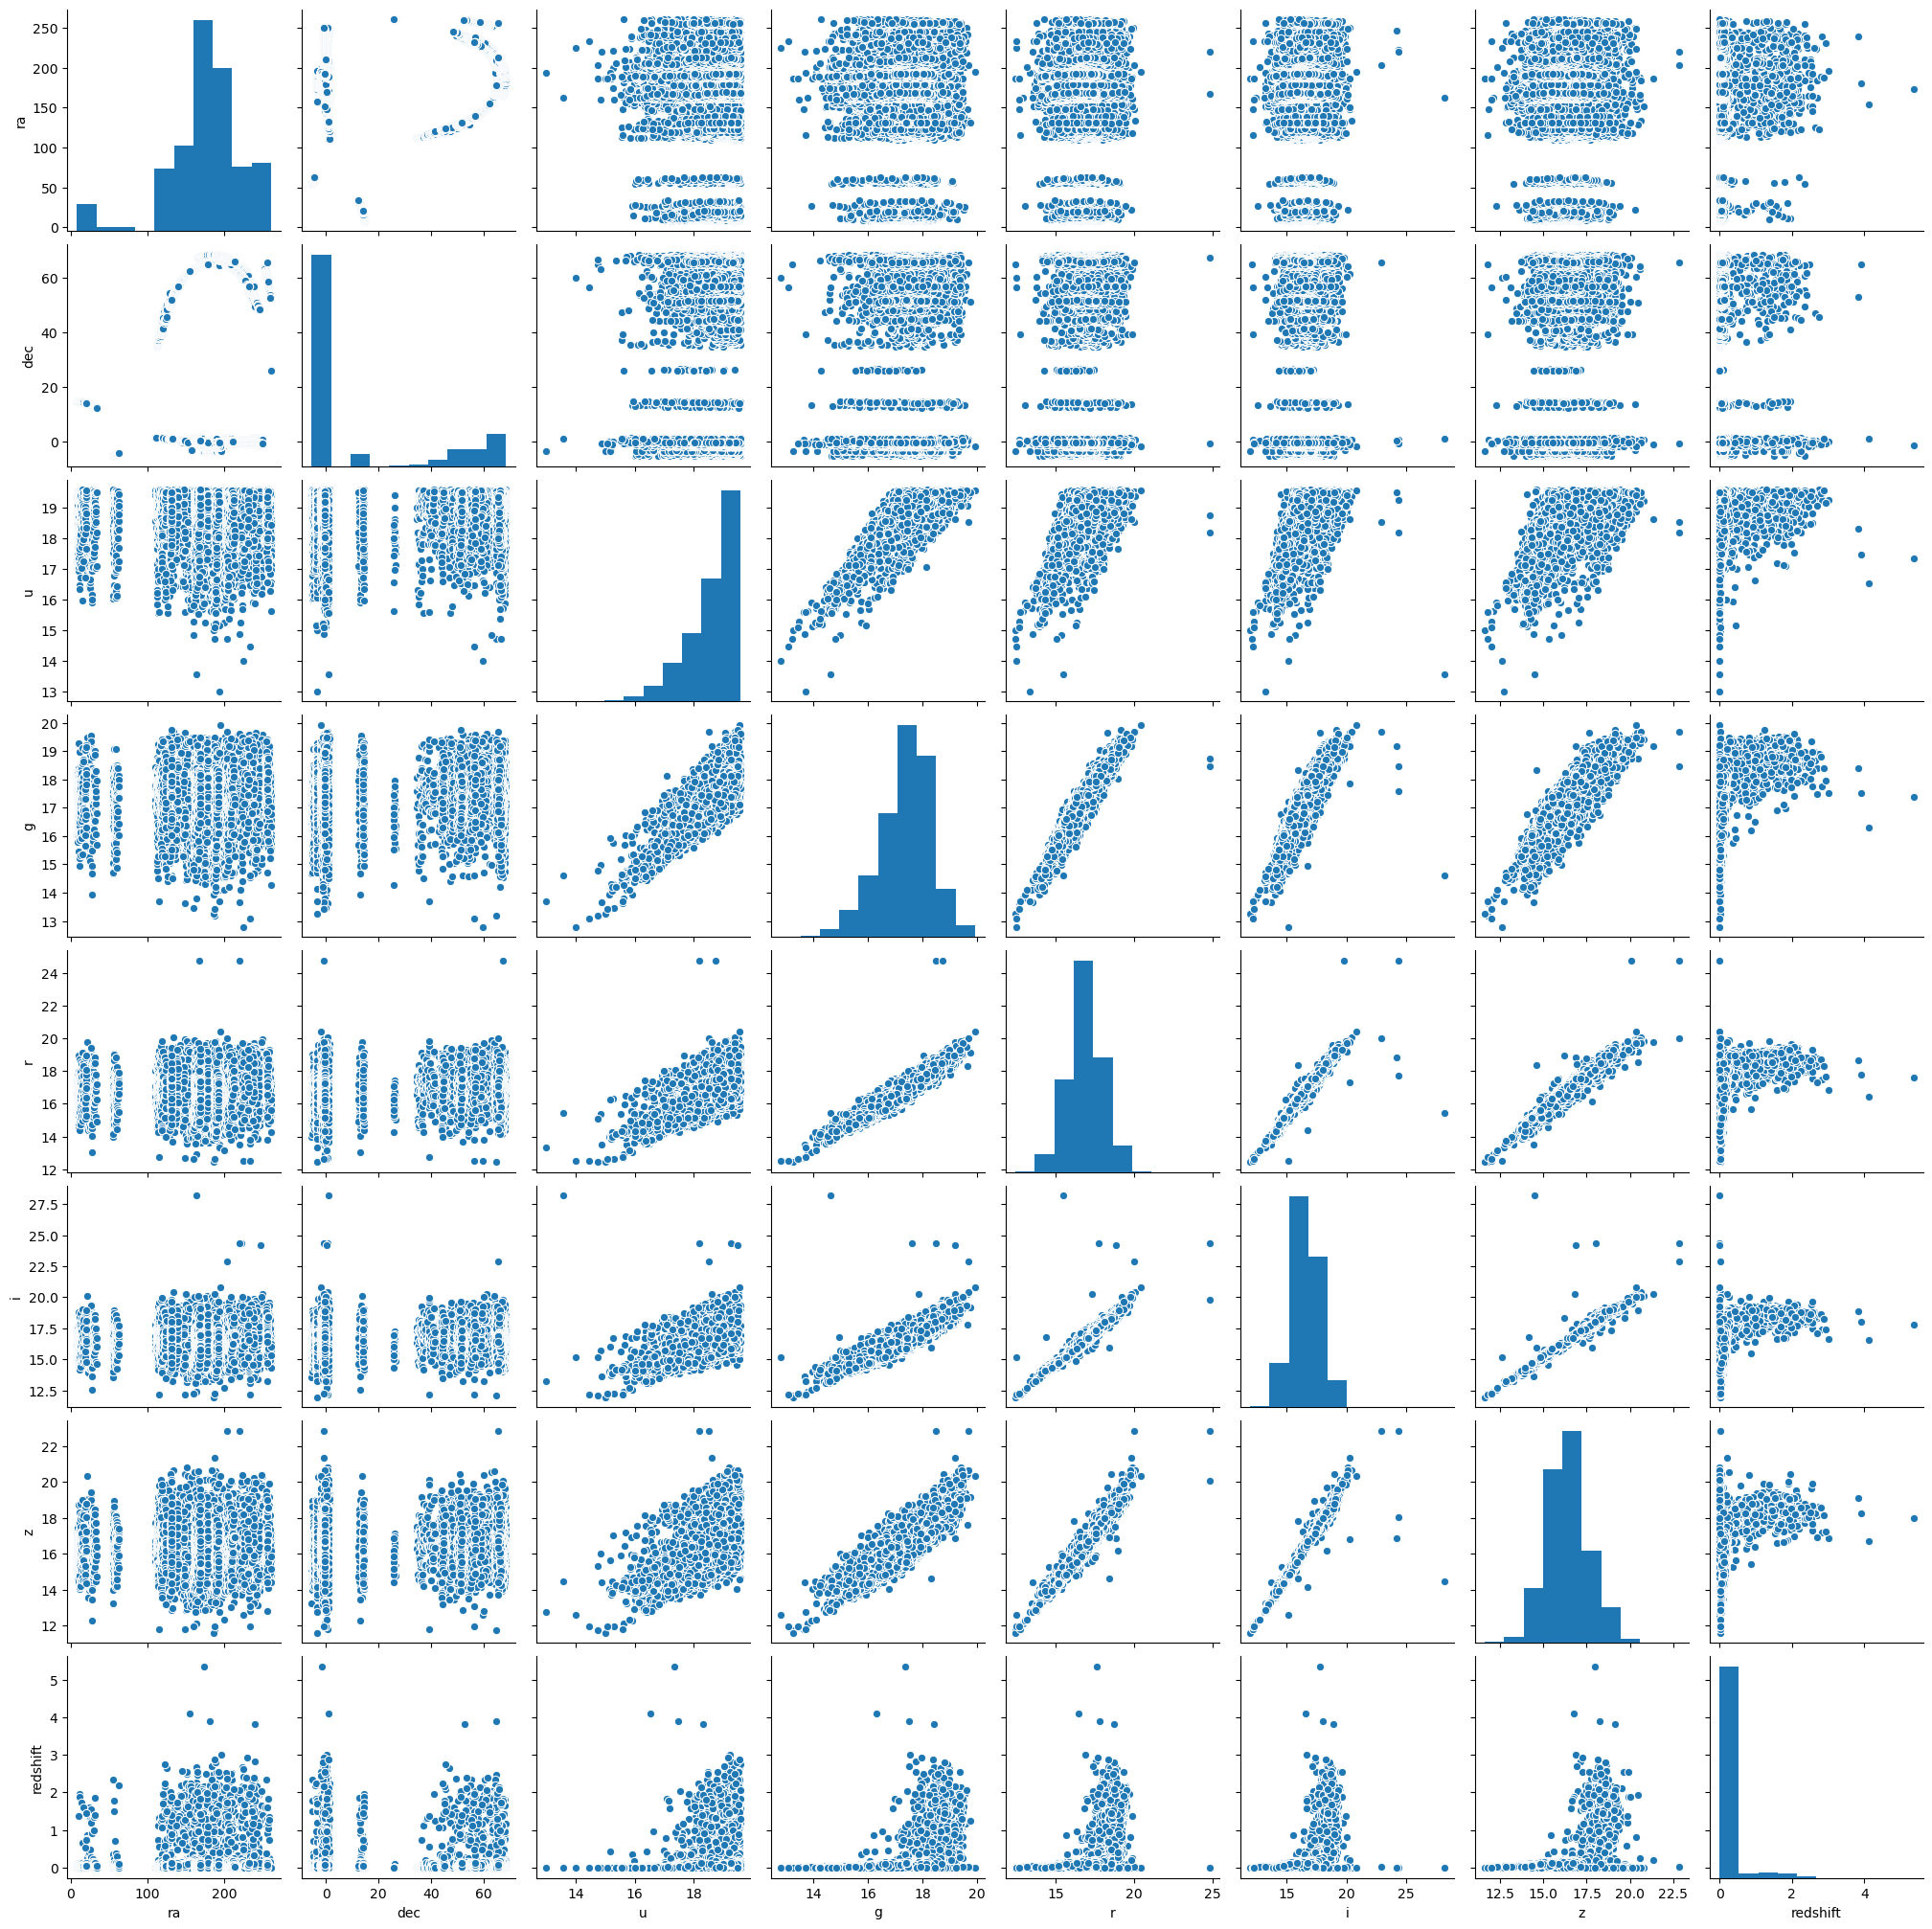

In [48]:
# pairplot
sns.pairplot(df)

In [49]:
# relations ['u','g','r','i','z']

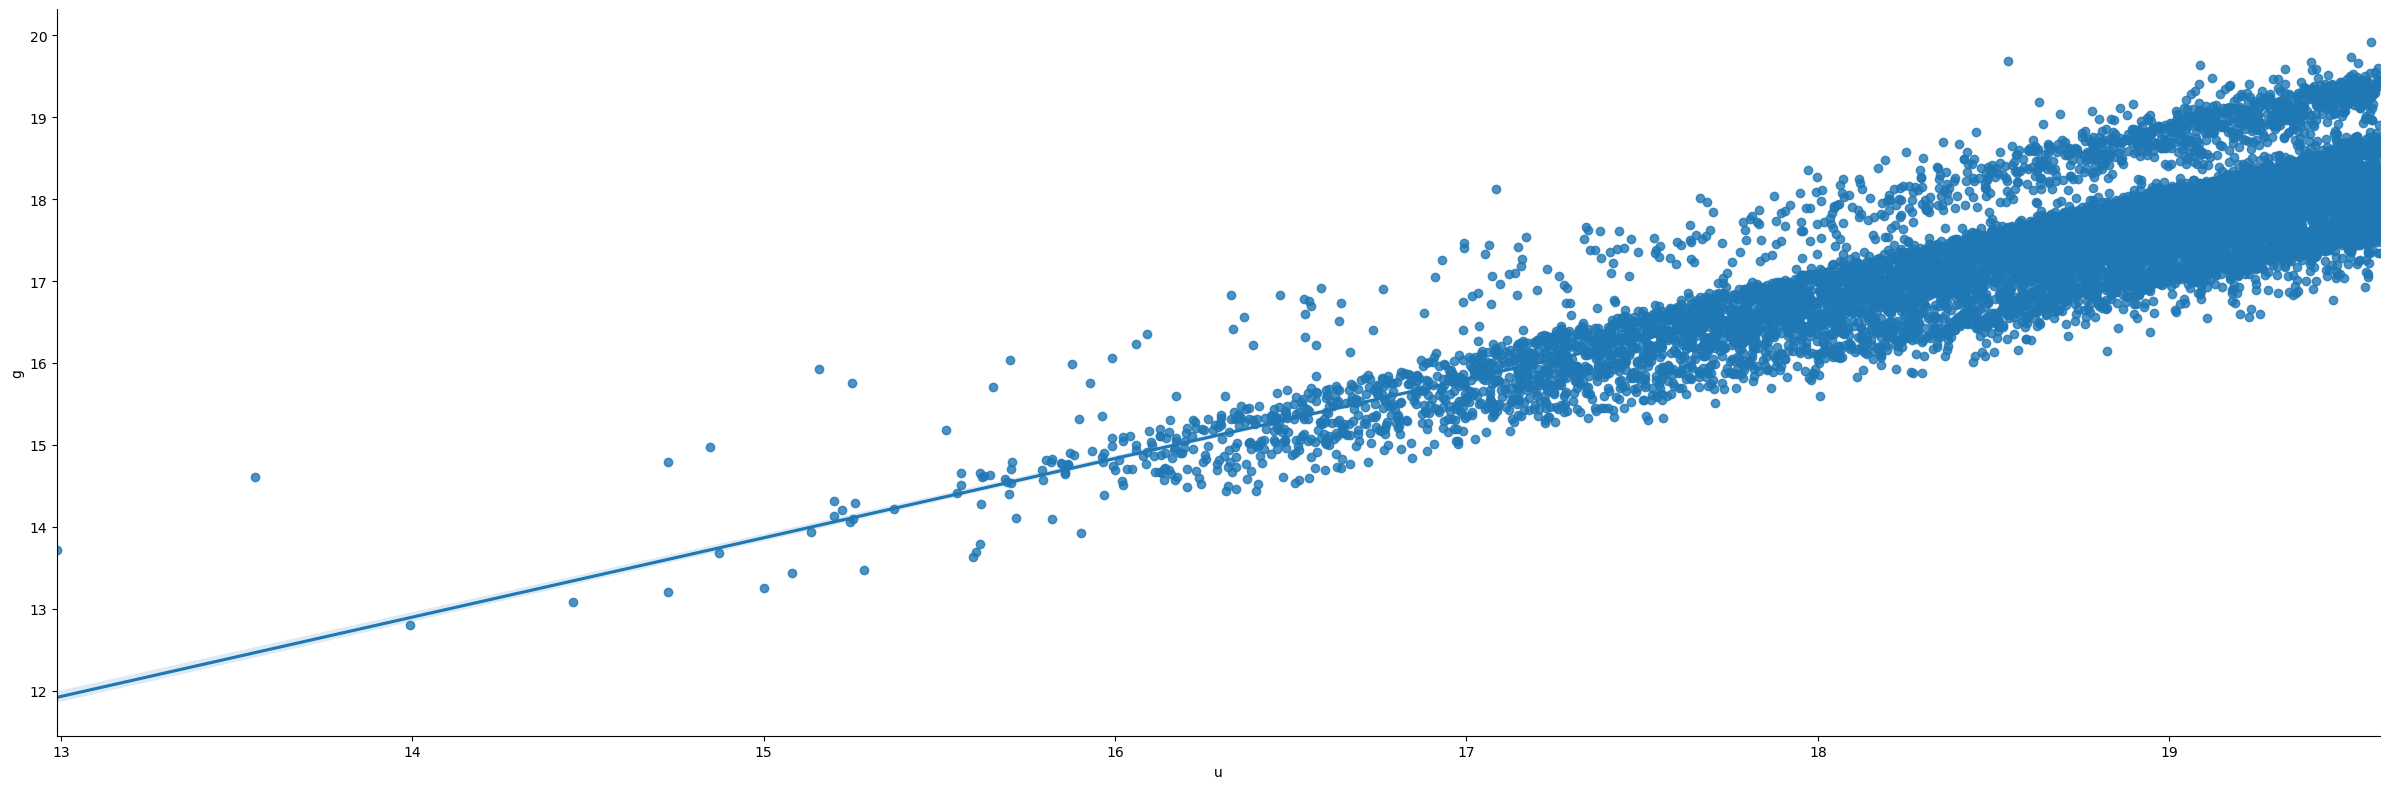

In [50]:
sns.lmplot('u','g',data=df,aspect=3,height=8)

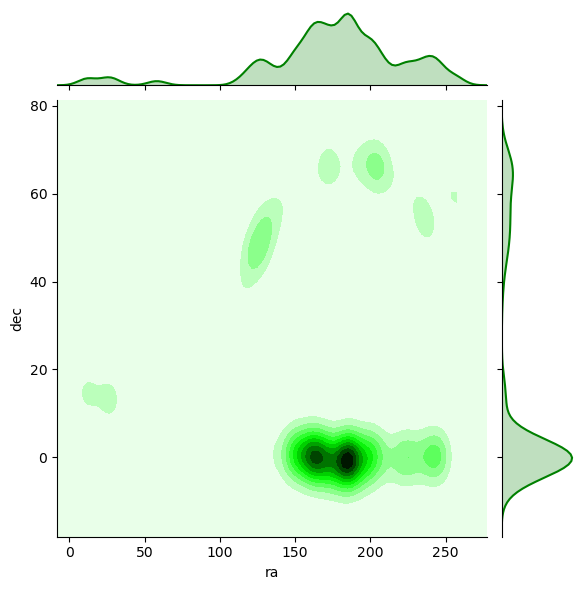

In [51]:
sns.jointplot('ra','dec',data=df,kind='kde',color='g')

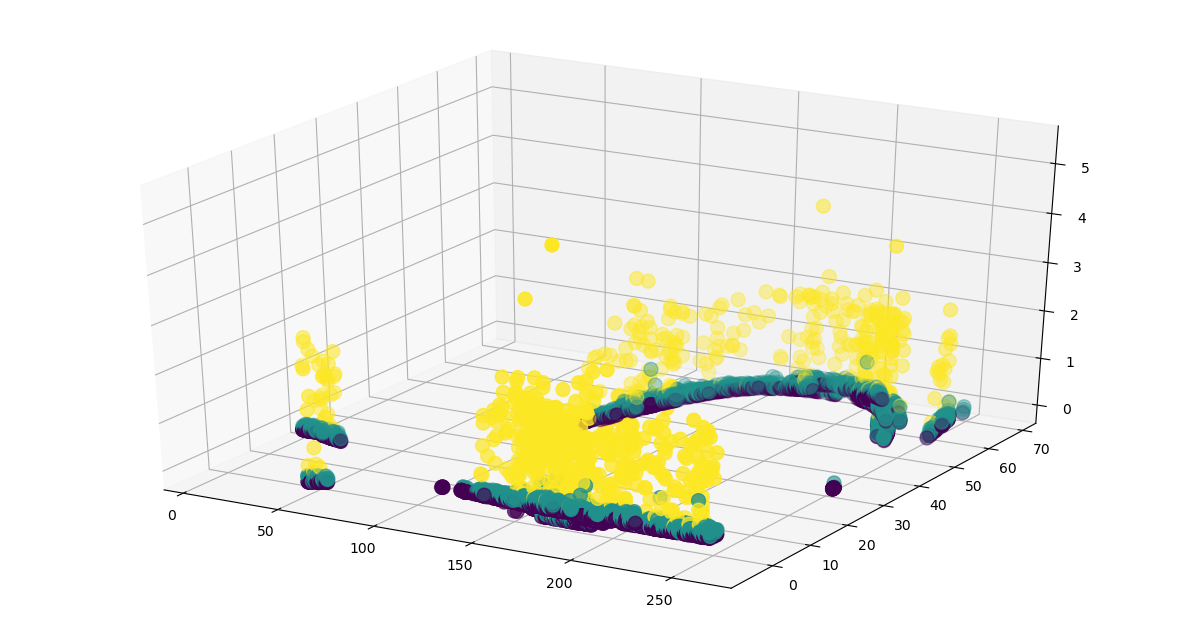

In [52]:
plt.figure(figsize=(15,8))
ax = plt.axes(projection='3d')
ax.scatter3D(df.ra, df.dec, df.redshift,c=df['class'].map({'STAR':0,'GALAXY':1,'QSO':2}),s=100)

## Removing the outliers

In [53]:
df.head()

ra       dec         u         g         r         i         z  \
0  183.531326  0.089693  19.47406  17.04240  15.94699  15.50342  15.22531   
1  183.598370  0.135285  18.66280  17.21449  16.67637  16.48922  16.39150   
2  183.680207  0.126185  19.38298  18.19169  17.47428  17.08732  16.80125   
3  183.870529  0.049911  17.76536  16.60272  16.16116  15.98233  15.90438   
4  183.883288  0.102557  17.55025  16.26342  16.43869  16.55492  16.61326   

    class  redshift  
0    STAR -0.000009  
1    STAR -0.000055  
2  GALAXY  0.123111  
3    STAR -0.000111  
4    STAR  0.000590

In [54]:
# create a copy of the raw dataset to preprocess for building the model.
df_clean = df.copy()

In [55]:
# sperating num and cat features.

In [56]:
from feature_engine.missing_data_imputers import _find_categorical_variables,_find_numerical_variables

In [57]:
num_feat = _find_numerical_variables(df)
cat_feat = _find_categorical_variables(df)

In [58]:
num_feat

['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'redshift']

In [59]:
cat_feat

['class']

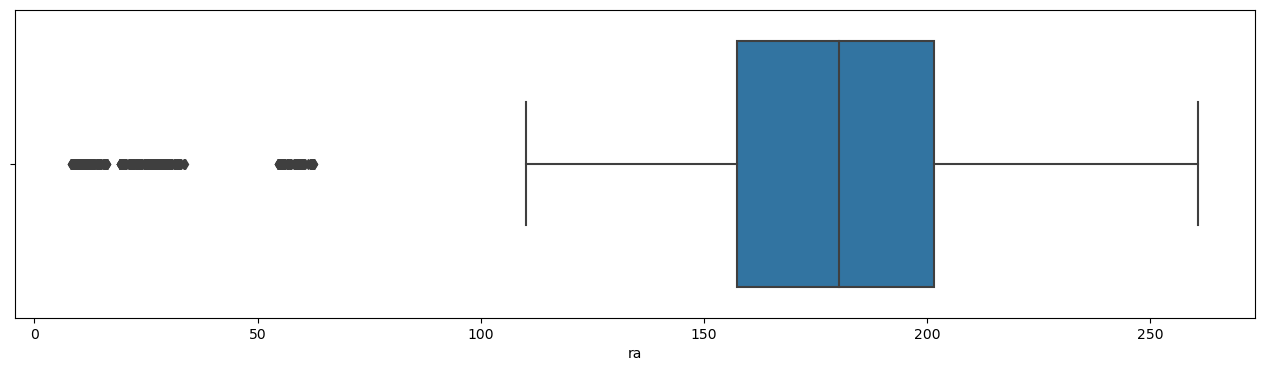

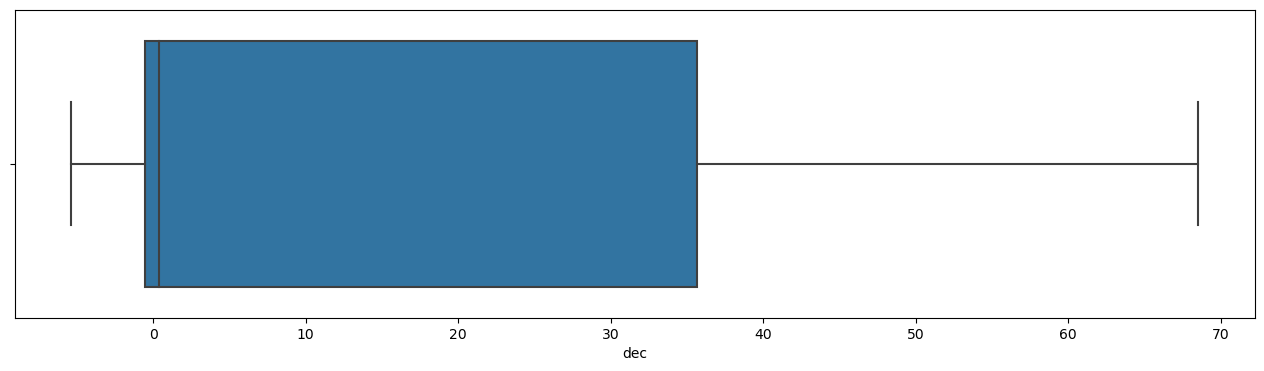

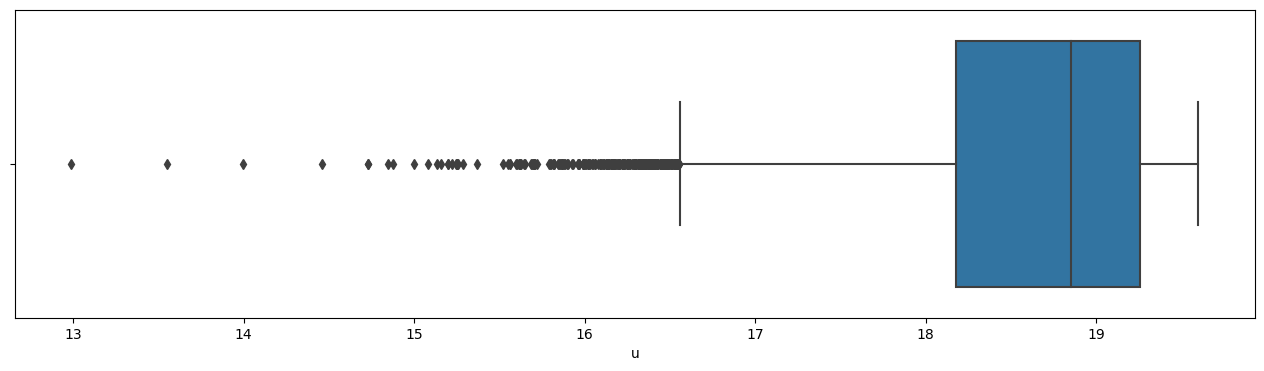

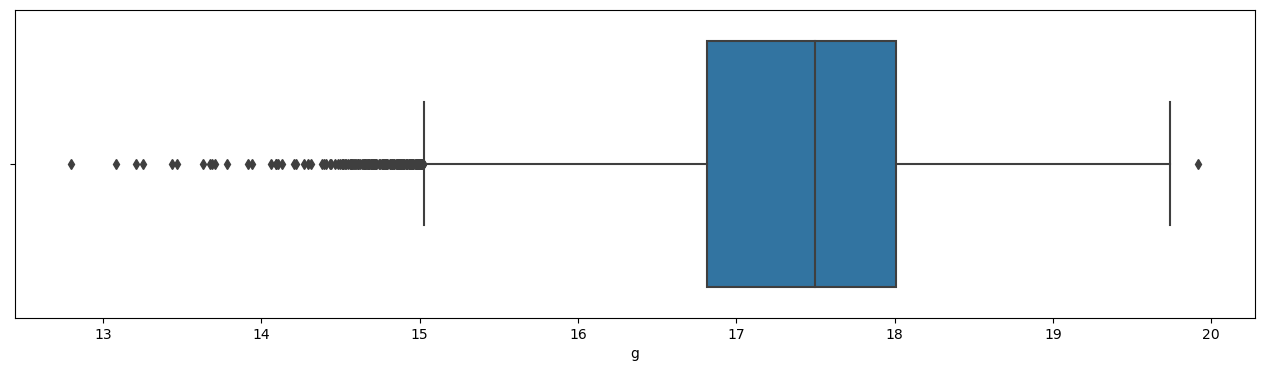

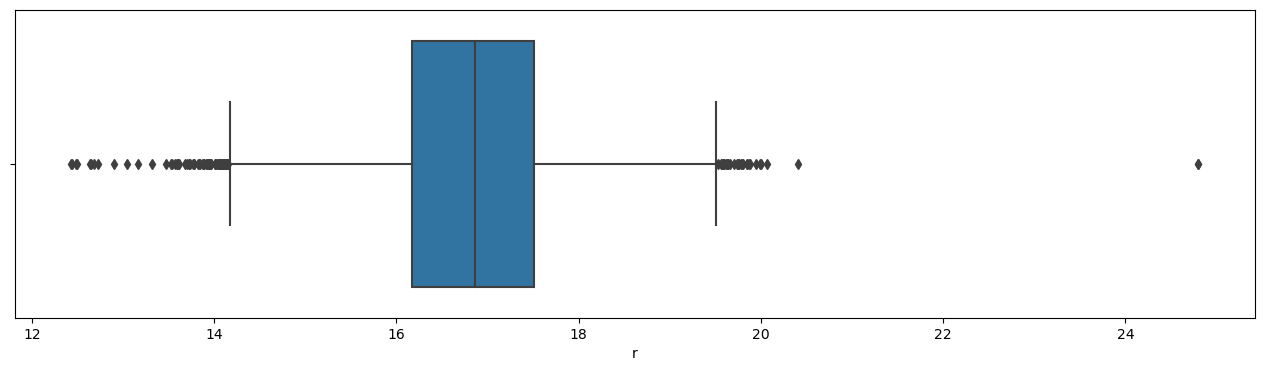

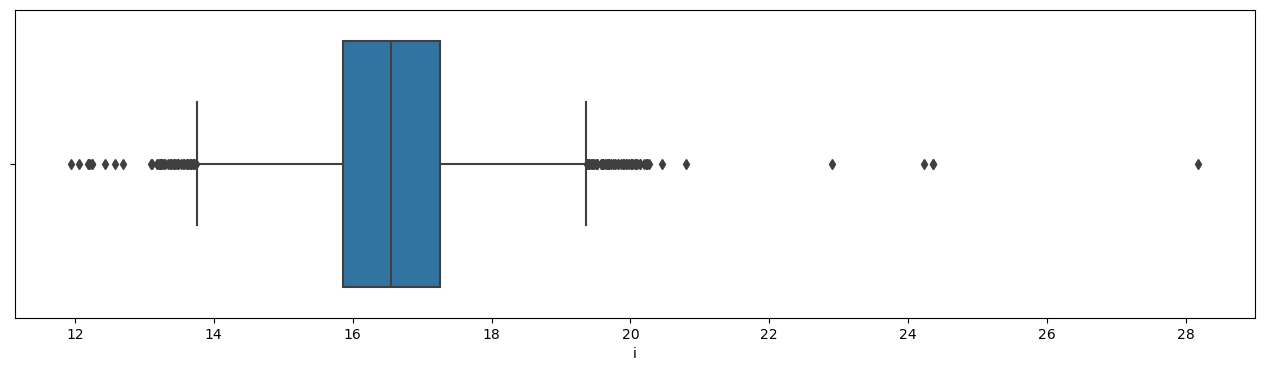

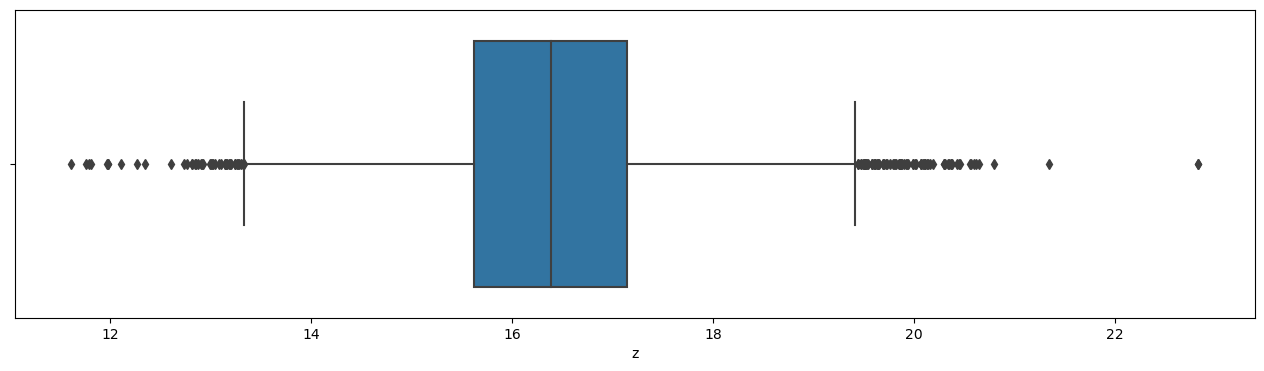

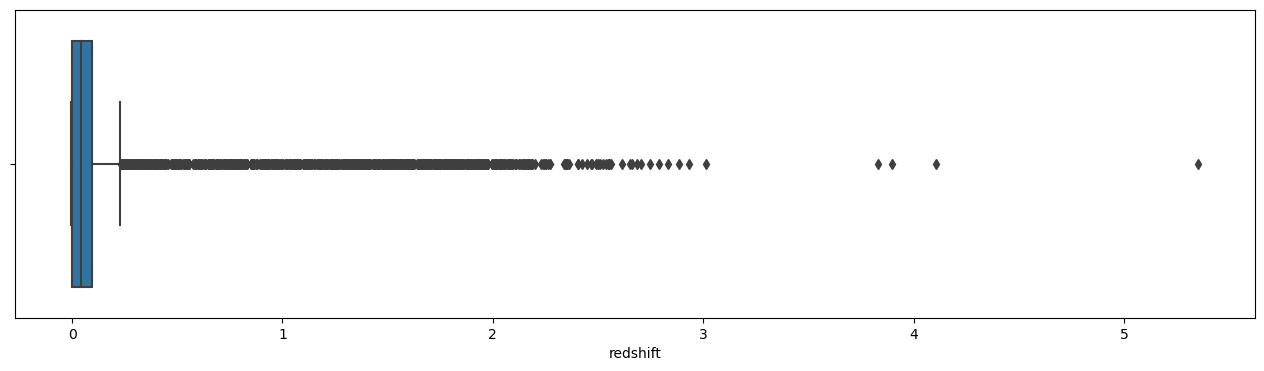

In [60]:
for col in num_feat:
    plt.figure(figsize=(16,4))
    sns.boxplot(df[col])

In [61]:
# removing outliers using IRQ method

In [62]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

ra          44.176333
dec         36.188432
u            1.081197
g            1.195045
r            1.339343
i            1.404845
z            1.523162
redshift     0.092498
dtype: float64


In [63]:
df_clean = df_clean[~((df_clean < (Q1 - 1.5 * IQR)) |(df_clean > (Q3 + 1.5 * IQR))).any(axis=1)]

In [64]:
len(df)

10000

In [65]:
len(df_clean)

8385

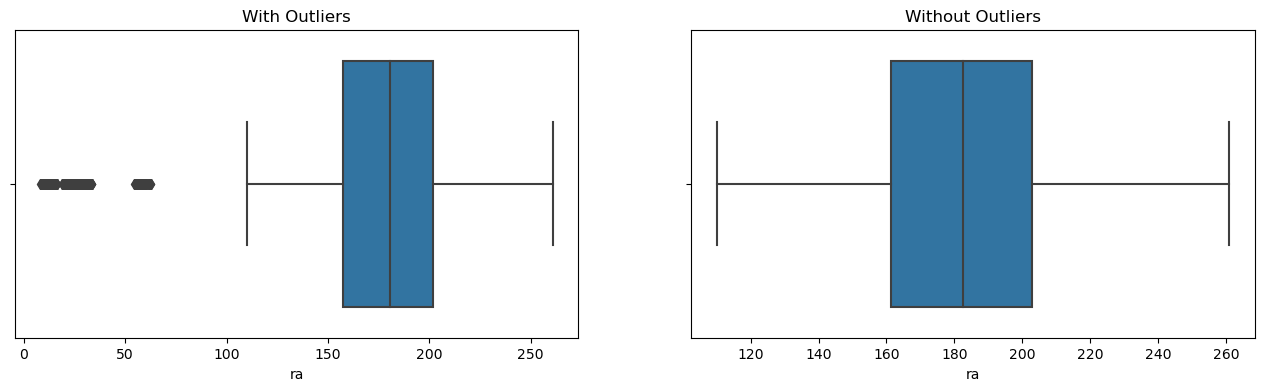

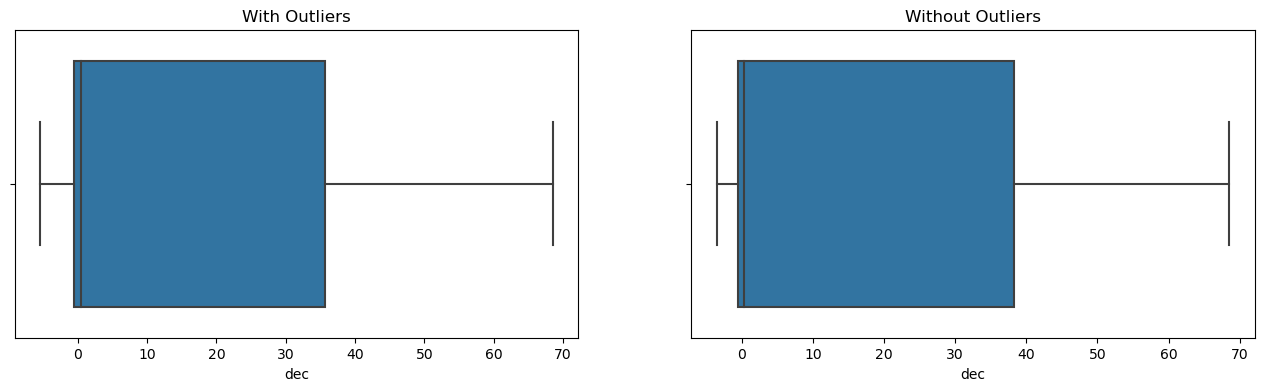

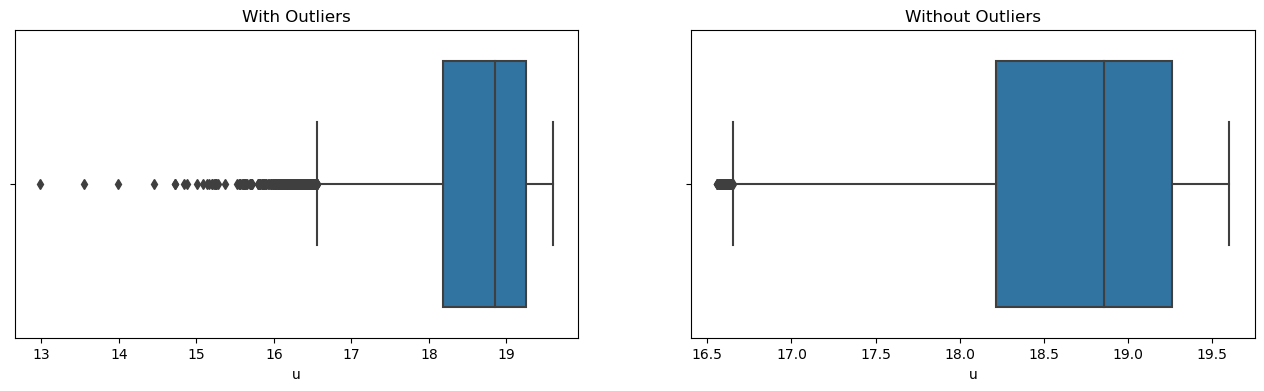

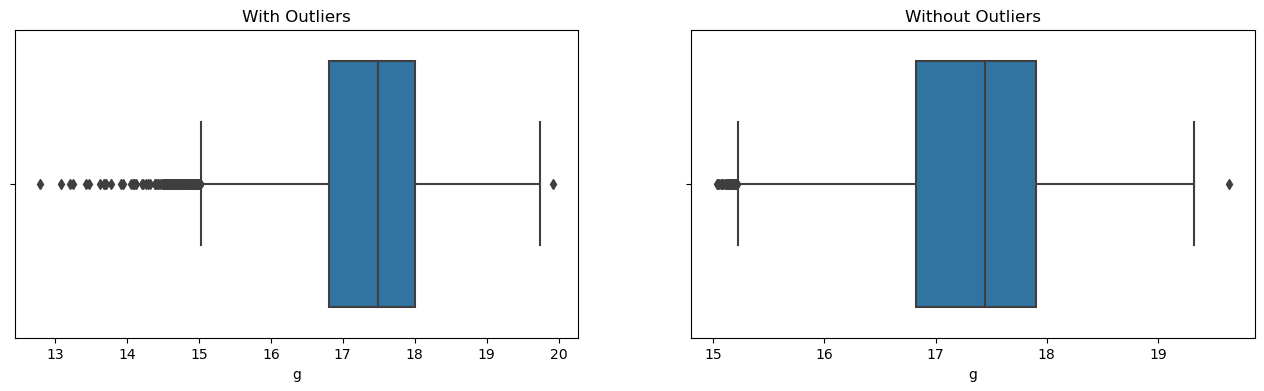

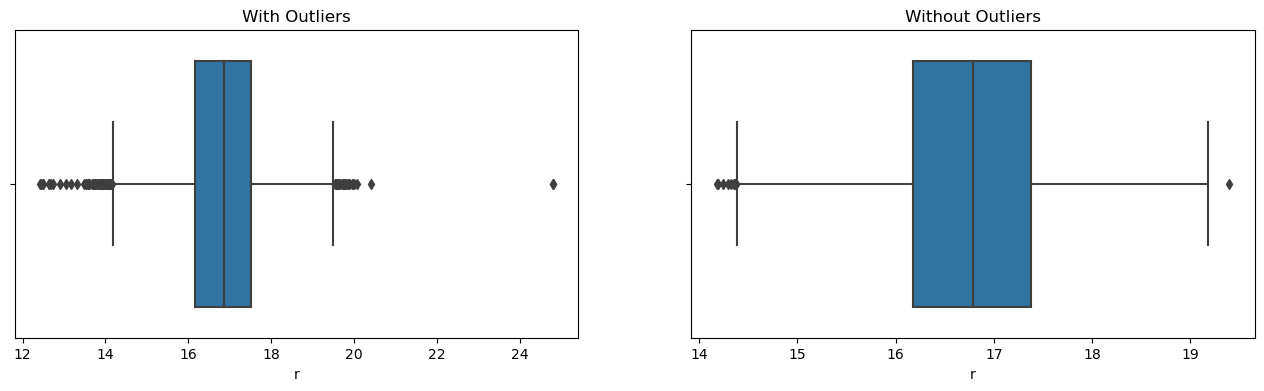

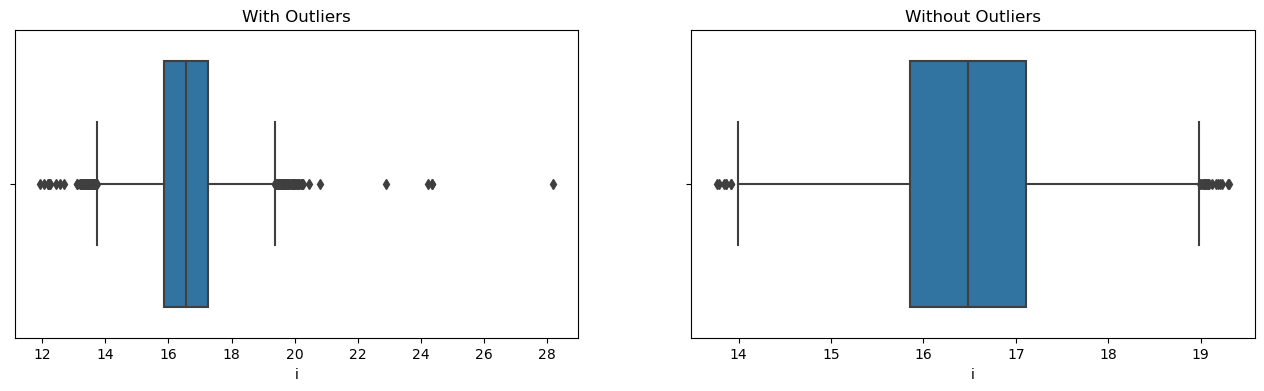

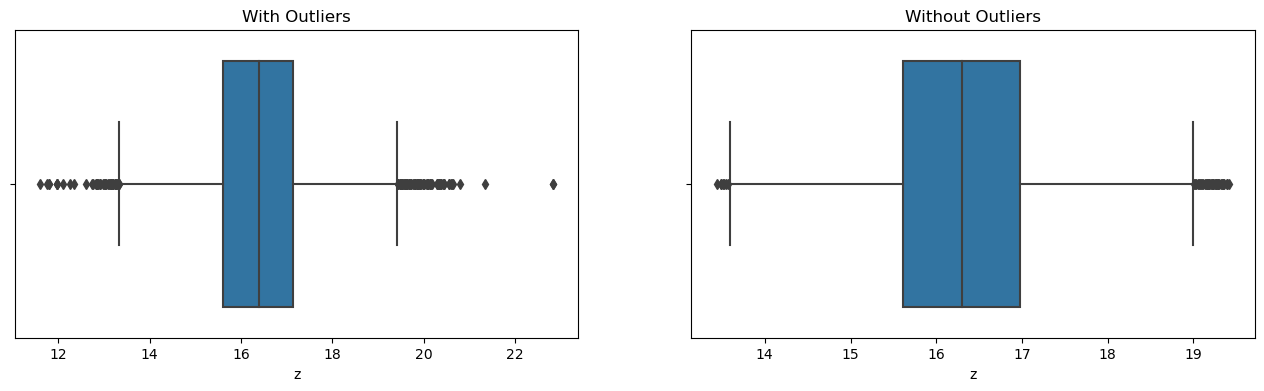

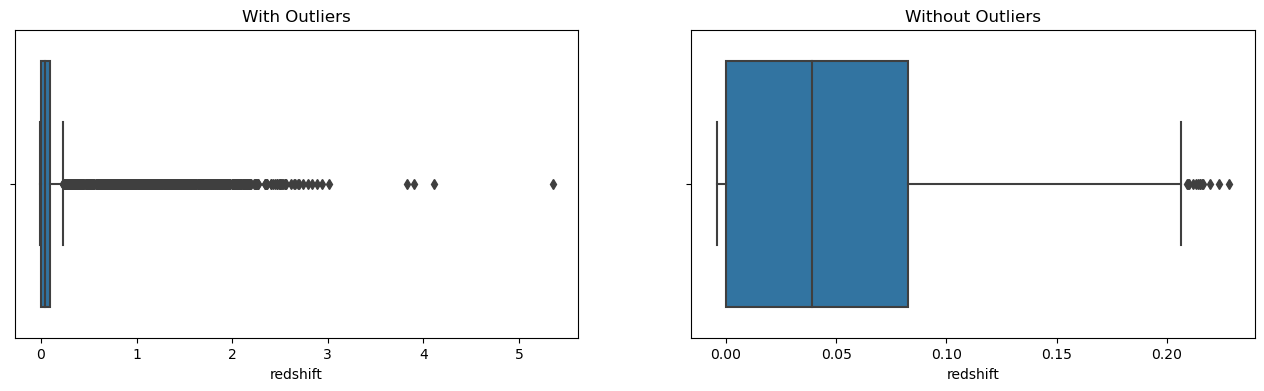

In [66]:
for col in num_feat:
    fig = fig_this_size(16,4)
    
    fig.add_subplot(121)
    sns.boxplot(df[col])
    plt.title('With Outliers')
    fig.add_subplot(122)
    sns.boxplot(df_clean[col])
    plt.title('Without Outliers')

## Skewness of the Features.

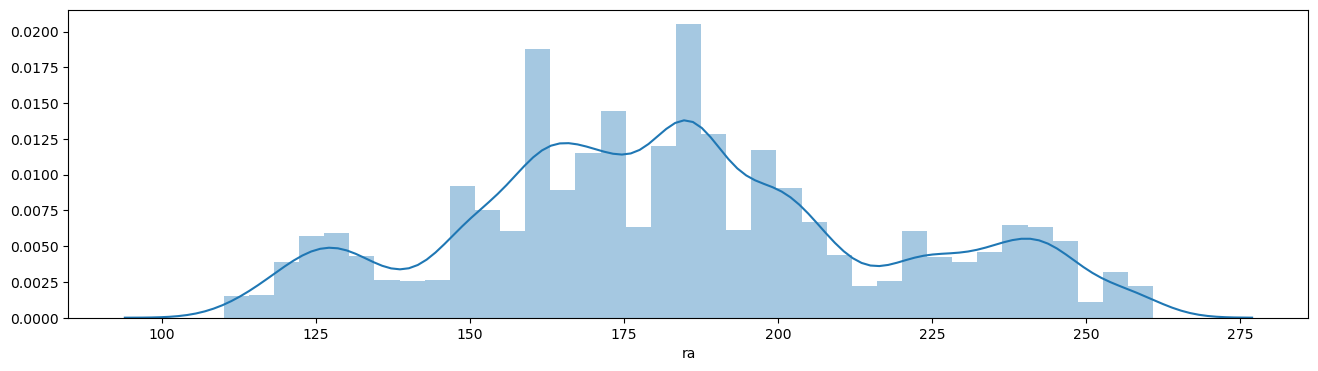

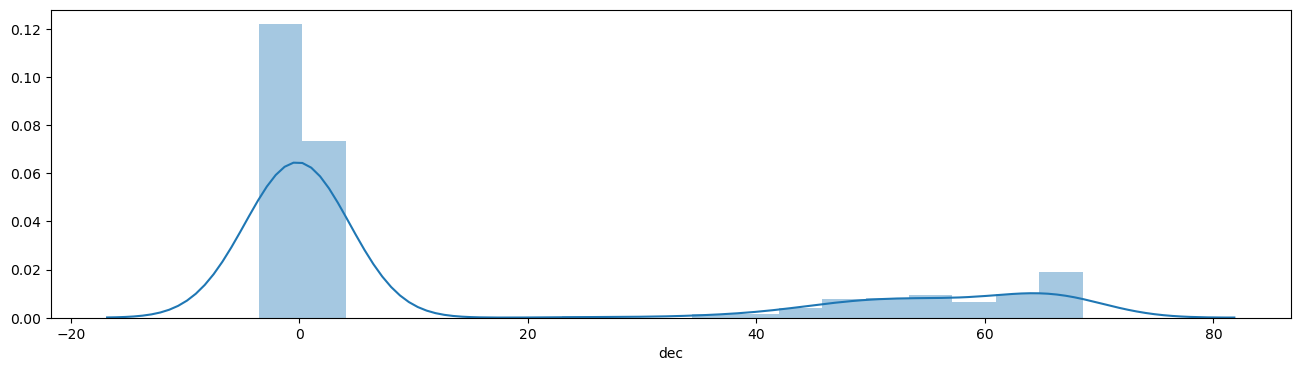

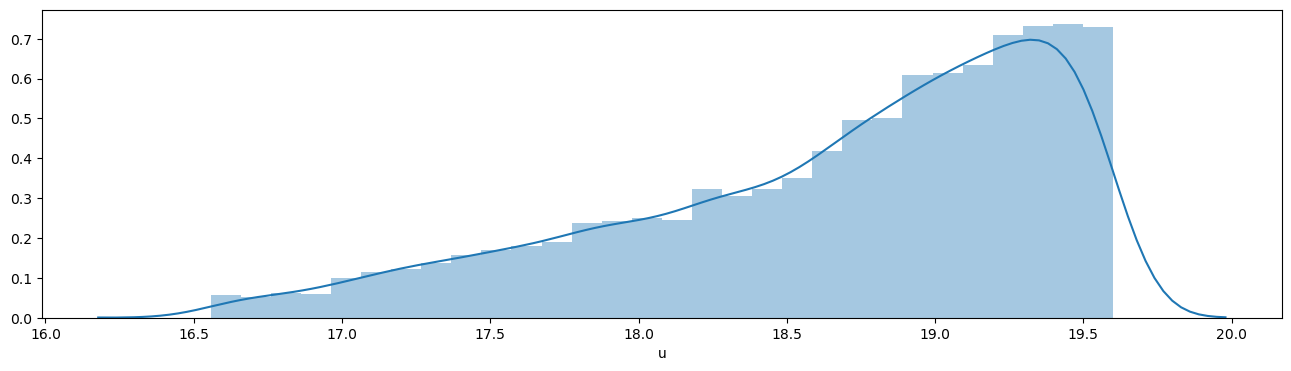

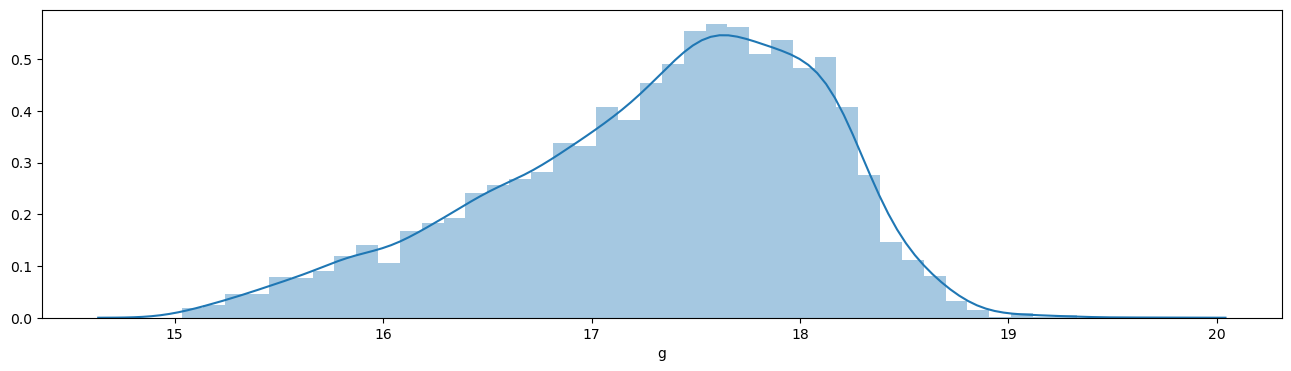

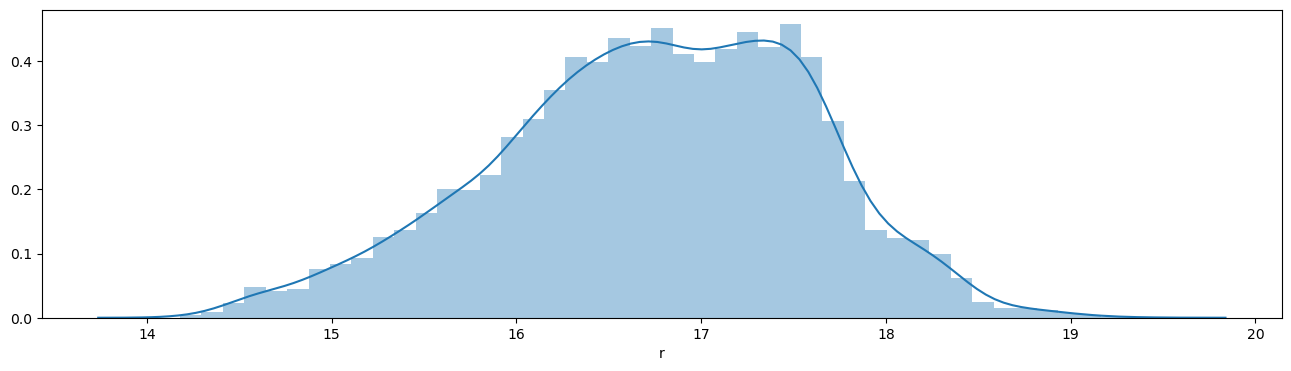

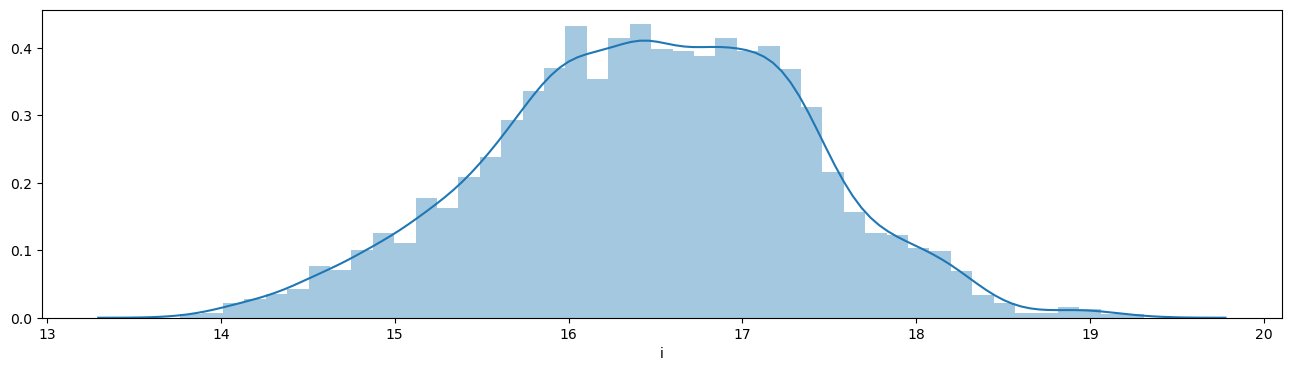

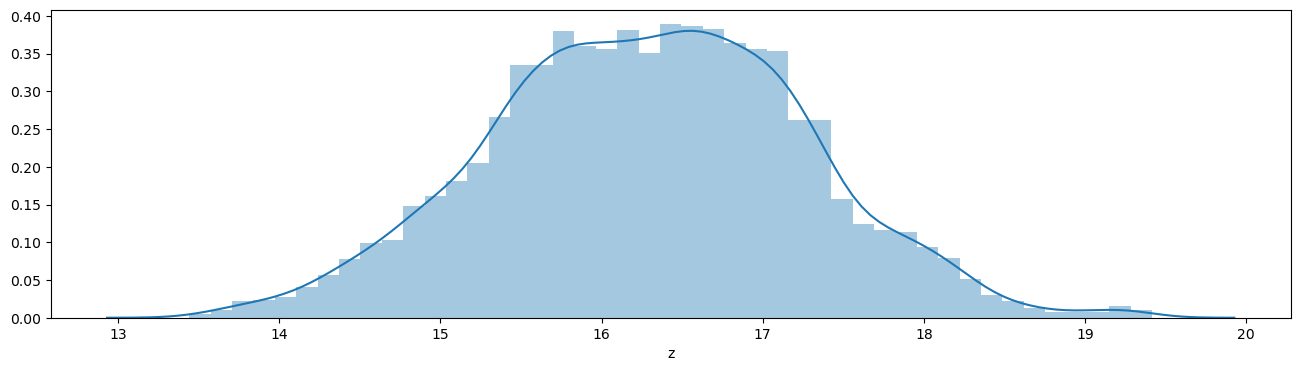

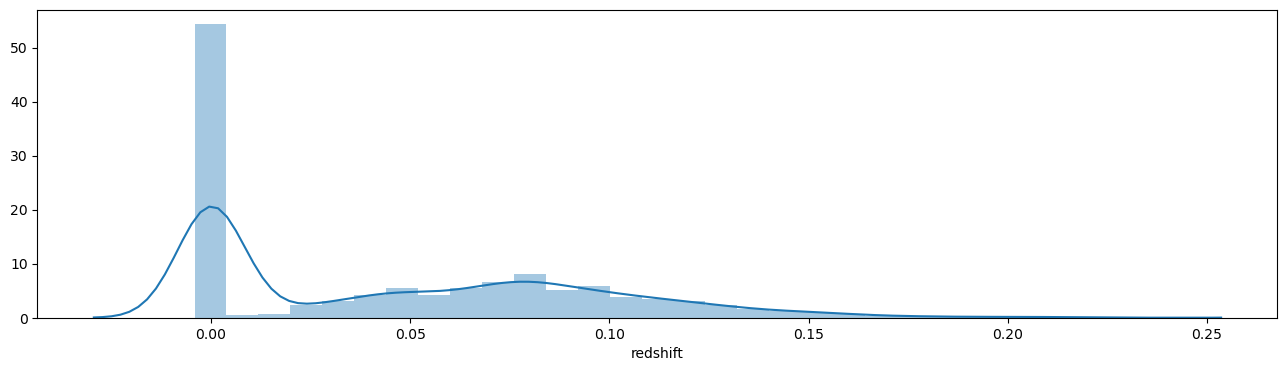

In [67]:
# plot the distribution of the features
for col in num_feat:
    fig_this_size(16,4)
    sns.distplot(df_clean[col])

In [68]:
# skew stats

In [69]:
df_clean[num_feat].skew()

ra          0.211583
dec         1.198244
u          -0.837939
g          -0.568722
r          -0.270037
i          -0.102505
z           0.019648
redshift    0.670788
dtype: float64

In [70]:
# try1 : log transformation
np.log(df_clean[num_feat]+1).skew()

ra         -0.218995
dec         0.265204
u          -0.903614
g          -0.662281
r          -0.390798
i          -0.243757
z          -0.139369
redshift    0.603805
dtype: float64

In [71]:
# try2 : Square root transformation
np.sqrt(df_clean[num_feat]).skew()

ra         -0.000341
dec         0.332983
u          -0.872348
g          -0.618066
r          -0.333901
i          -0.177416
z          -0.064837
redshift   -0.359364
dtype: float64

In [72]:
# try3 : Cude Root transformation
np.cbrt(df_clean[num_feat]).skew()

ra         -0.073148
dec         0.593586
u          -0.883933
g          -0.634609
r          -0.355276
i          -0.202408
z          -0.092962
redshift   -0.206164
dtype: float64

* The cube root transformation fits the skew transformation very well.

In [73]:
# finallizing the skew transformation
df_clean[num_feat] = np.cbrt(df_clean[num_feat])

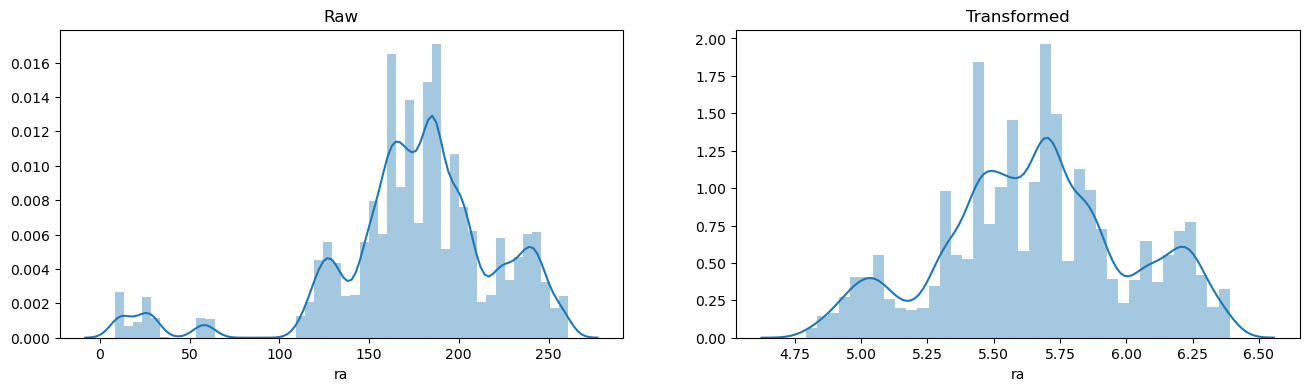

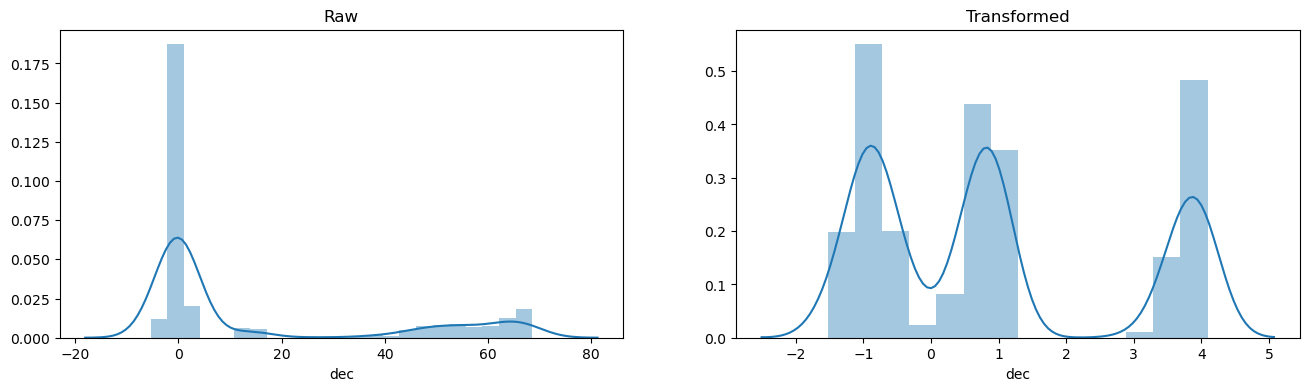

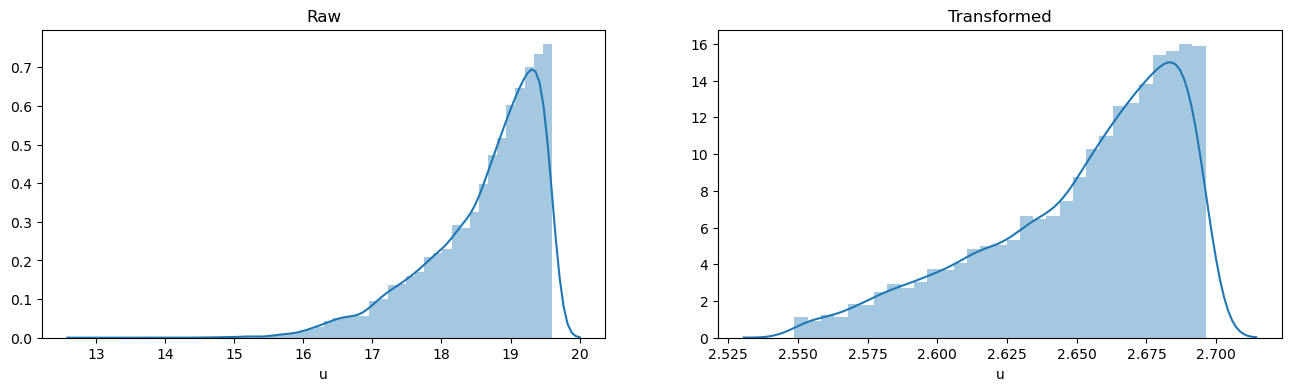

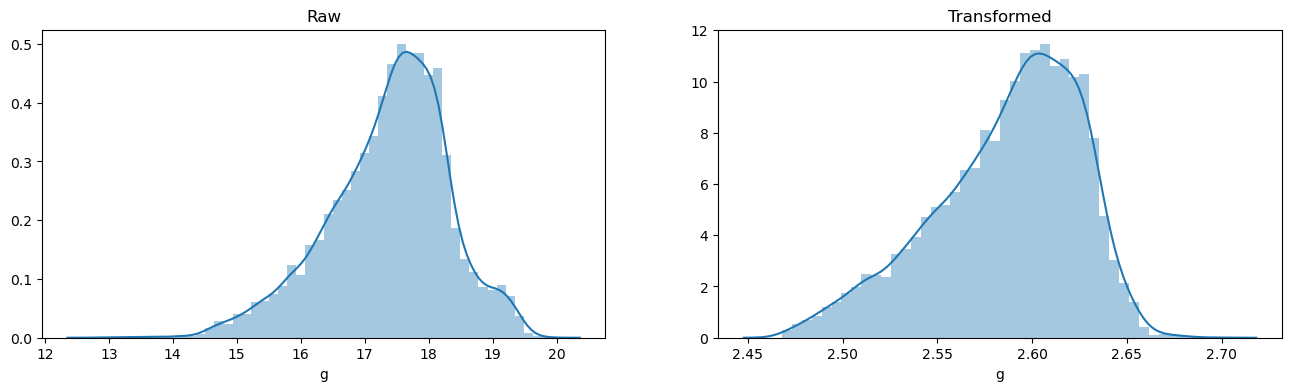

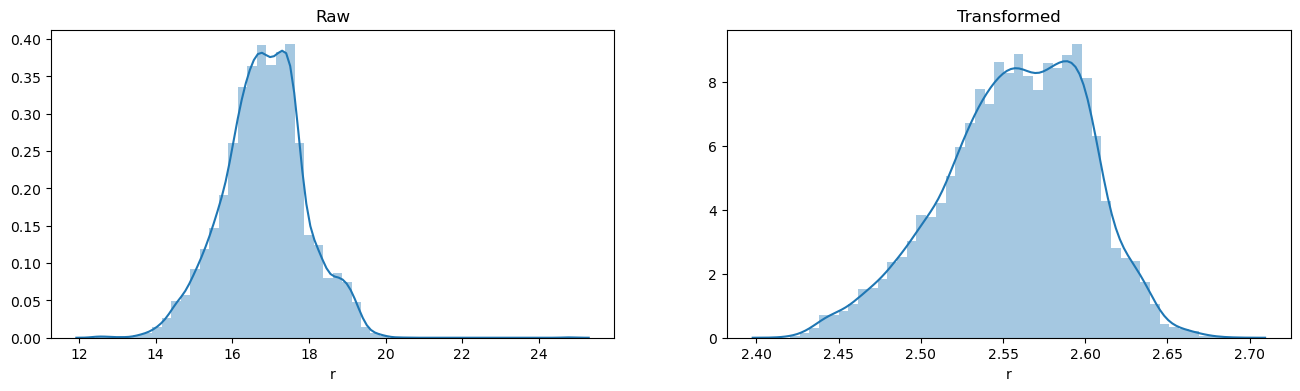

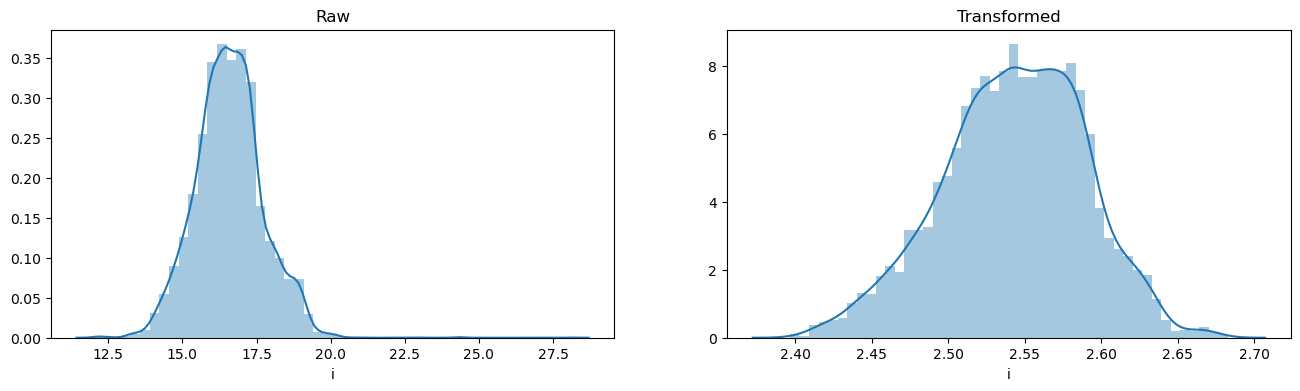

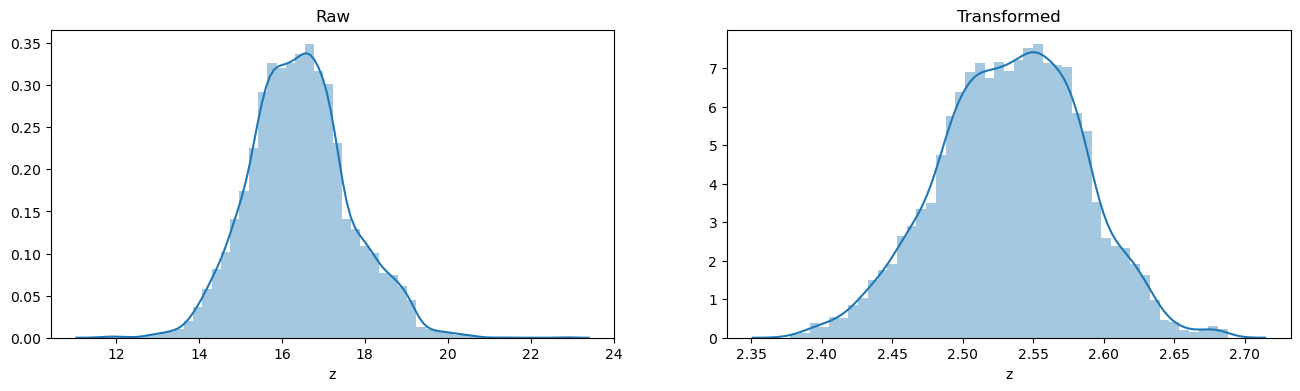

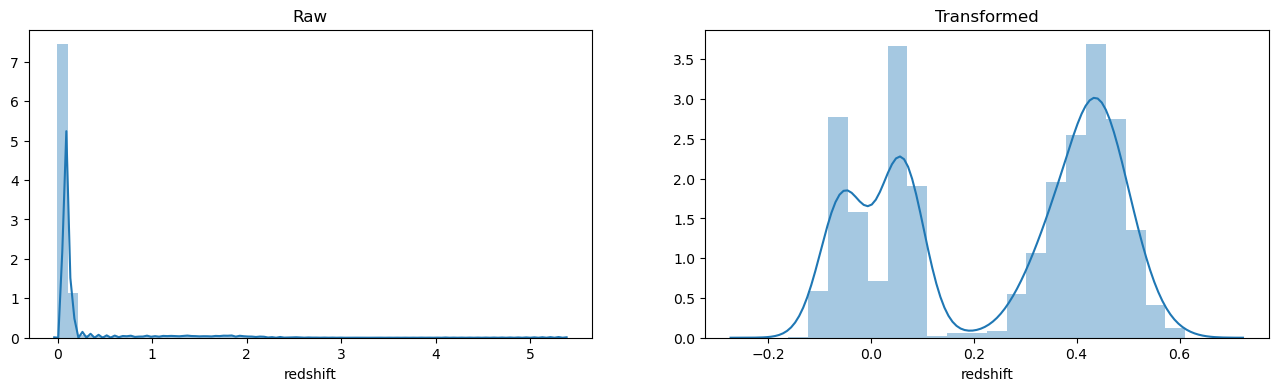

In [74]:
# before and after : skew transformation

for col in num_feat:
    fig = fig_this_size(16,4)
    
    fig.add_subplot(121)
    sns.distplot(df[col])
    plt.title('Raw')
    fig.add_subplot(122)
    sns.distplot(df_clean[col])
    plt.title('Transformed')

* Much better.

In [75]:
df_clean

ra       dec         u         g         r         i         z  \
0     5.682901  0.447630  2.690412  2.573418  2.517056  2.493499  2.478499   
1     5.683593  0.513354  2.652522  2.582050  2.554860  2.545267  2.540229   
2     5.684437  0.501575  2.686211  2.630012  2.594975  2.575677  2.561222   
3     5.686400  0.368184  2.609304  2.551094  2.528274  2.518914  2.514812   
4     5.686531  0.468081  2.598730  2.533596  2.542665  2.548643  2.551633   
...        ...       ...       ...       ...       ...       ...       ...   
9995  5.082839  3.721462  2.659843  2.594789  2.566993  2.555201  2.546115   
9996  5.082706  3.724631  2.633903  2.593202  2.575154  2.556914  2.556014   
9997  5.085884  3.724526  2.657033  2.609915  2.597172  2.592930  2.592309   
9998  5.084912  3.726594  2.662907  2.616399  2.597805  2.589446  2.578315   
9999  5.087333  3.727847  2.681254  2.590214  2.535775  2.511176  2.493631   

       class  redshift  
0       STAR -0.020770  
1       STAR -0.038006  
2     GALAXY  0.497469  
3       STAR -0.048003  
4       STAR  0.083889  
...      ...       ...  
9995  GALAXY  0.302144  
9996  GALAXY  0.490171  
9997    STAR -0.073777  
9998  GALAXY  0.241123  
9999  GALAXY  0.491064  

[8385 rows x 9 columns]

## Feature and target split

In [76]:
X = df_clean.drop('class',1)
y = df_clean['class']

In [77]:
# check the shape
X.shape,y.shape

((8385, 8), (8385,))

In [78]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [79]:
# shapes again
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((5869, 8), (5869,), (2516, 8), (2516,))

## Building the model

In [80]:
# importing the training dependencies
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier

In [81]:
# importing the evalation metrics 
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import f1_score,precision_score,recall_score,plot_confusion_matrix,plot_roc_curve,classification_report

In [82]:
# helper funciton
def train_n_ret_scores(model):
    model.fit(X_train,y_train)
    
    print('Train_Acc:', model.score(X_train,y_train))
    print('Test_Acc:', model.score(X_test,y_test))
    print('Recall:', recall_score(y_test,model.predict(X_test),average='micro'))
    print('Precision:',recall_score(y_test,model.predict(X_test),average='micro'))
    print('F1:',recall_score(y_test,model.predict(X_test),average='micro'))


In [83]:
# try1 : Logistic Regression

train_n_ret_scores(LogisticRegression())

Train_Acc: 0.9884136990969501
Test_Acc: 0.9884737678855325
Recall: 0.9884737678855325
Precision: 0.9884737678855325
F1: 0.9884737678855325


In [84]:
#try2: SVC
train_n_ret_scores(SVC())

Train_Acc: 0.9879025387629919
Test_Acc: 0.9884737678855325
Recall: 0.9884737678855325
Precision: 0.9884737678855325
F1: 0.9884737678855325


In [85]:
#try3: KNN
train_n_ret_scores(KNeighborsClassifier())

Train_Acc: 0.9889248594309081
Test_Acc: 0.9888712241653418
Recall: 0.9888712241653418
Precision: 0.9888712241653418
F1: 0.9888712241653418


In [86]:
#try5: Decision Treaes
train_n_ret_scores(DecisionTreeClassifier())

Train_Acc: 1.0
Test_Acc: 0.9888712241653418
Recall: 0.9888712241653418
Precision: 0.9888712241653418
F1: 0.9888712241653418


In [87]:
#try4: Random Forest
train_n_ret_scores(RandomForestClassifier())

Train_Acc: 1.0
Test_Acc: 0.9904610492845787
Recall: 0.9904610492845787
Precision: 0.9904610492845787
F1: 0.9904610492845787


In [88]:
#try5: Gadient Boosting
train_n_ret_scores(GradientBoostingClassifier())

Train_Acc: 1.0
Test_Acc: 0.9884737678855325
Recall: 0.9884737678855325
Precision: 0.9884737678855325
F1: 0.9884737678855325


In [89]:
#try6: Adaboost
train_n_ret_scores(AdaBoostClassifier())

Train_Acc: 0.5983983642869314
Test_Acc: 0.6081081081081081
Recall: 0.6081081081081081
Precision: 0.6081081081081081
F1: 0.6081081081081081


In [90]:
#try7: Adaboost with Logistic
train_n_ret_scores(AdaBoostClassifier(base_estimator=LogisticRegression()))

Train_Acc: 0.9742715965241098
Test_Acc: 0.9733704292527822
Recall: 0.9733704292527822
Precision: 0.9733704292527822
F1: 0.9733704292527822


In [91]:
# choosing the best model


models = [LogisticRegression(),SVC(),KNeighborsClassifier(n_neighbors=5),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=200),GradientBoostingClassifier(n_estimators=150),AdaBoostClassifier(RandomForestClassifier())]
model_names = 'Logistic_reg SVC KNN Random_forest Decision_Treee Gradient_boost Adaboost'.split()
models_df = pd.DataFrame(columns=['Algo','Train_acc','Test_acc','Precision','Recall','F1_score','Avg_CV'])

for (model,model_names) in zip(models,model_names):
    print(model_names)
    model.fit(X_train,y_train)
    
    y_preds = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    prec = precision_score(y_test,y_preds,average='micro')
    rec = recall_score(y_test,y_preds,average='micro')
    f1 = f1_score(y_test,y_preds,average='micro')
    
    avg_cv = np.mean(cross_val_score(model,X_train,y_train))
    
    models_df = models_df.append({'Algo':model_names,'Train_acc':train_acc,'Test_acc':test_acc,'Precision':prec,'Recall':rec,'F1_score':f1,'Avg_CV':avg_cv},ignore_index=True)

Logistic_reg
SVC
KNN
Random_forest
Decision_Treee
Gradient_boost
Adaboost


In [92]:
models_df

Algo  Train_acc  Test_acc  Precision    Recall  F1_score  \
0    Logistic_reg   0.988414  0.988474   0.988474  0.988474  0.988474   
1             SVC   0.987903  0.988474   0.988474  0.988474  0.988474   
2             KNN   0.988925  0.988871   0.988871  0.988871  0.988871   
3   Random_forest   1.000000  0.988076   0.988076  0.988076  0.988076   
4  Decision_Treee   1.000000  0.990859   0.990859  0.990859  0.990859   
5  Gradient_boost   1.000000  0.989666   0.989666  0.989666  0.989666   
6        Adaboost   1.000000  0.991256   0.991256  0.991256  0.991256   

     Avg_CV  
0  0.988244  
1  0.987732  
2  0.987732  
3  0.986709  
4  0.990629  
5  0.989606  
6  0.990629

In [101]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

      GALAXY       0.99      0.99      0.99      1412
         QSO       1.00      0.18      0.30        17
        STAR       0.99      1.00      1.00      1087

    accuracy                           0.99      2516
   macro avg       0.99      0.72      0.76      2516
weighted avg       0.99      0.99      0.99      2516



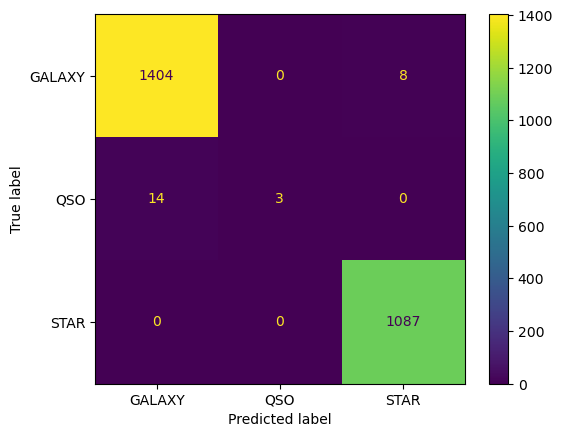

In [94]:
plot_confusion_matrix(model,X_test,y_test)

* Decision Tree is giving us the best metrics and just winning by 0.0002 percent in the cross val score.
* This project is the best example of : the more the data, the best the model.

In [102]:
# Picking the best model

In [103]:
best_model = DecisionTreeClassifier(X_train,y_train)

In [105]:
train_n_ret_scores(DecisionTreeClassifier())

Train_Acc: 1.0
Test_Acc: 0.9884737678855325
Recall: 0.9884737678855325
Precision: 0.9884737678855325
F1: 0.9884737678855325


In [106]:
# saving the best model.

In [107]:
import joblib

In [ ]:
joblib.dump(best_model,'Space_Server.pkl')

In [95]:
# PCA Visualization

In [96]:
from sklearn.decomposition import PCA

In [97]:
pca = PCA(n_components=3)

In [98]:
X_pca = pca.fit_transform(X)

In [99]:
X_pca = pd.DataFrame(X_pca,columns=['PCA_1','PCA_2','PCA_3'])

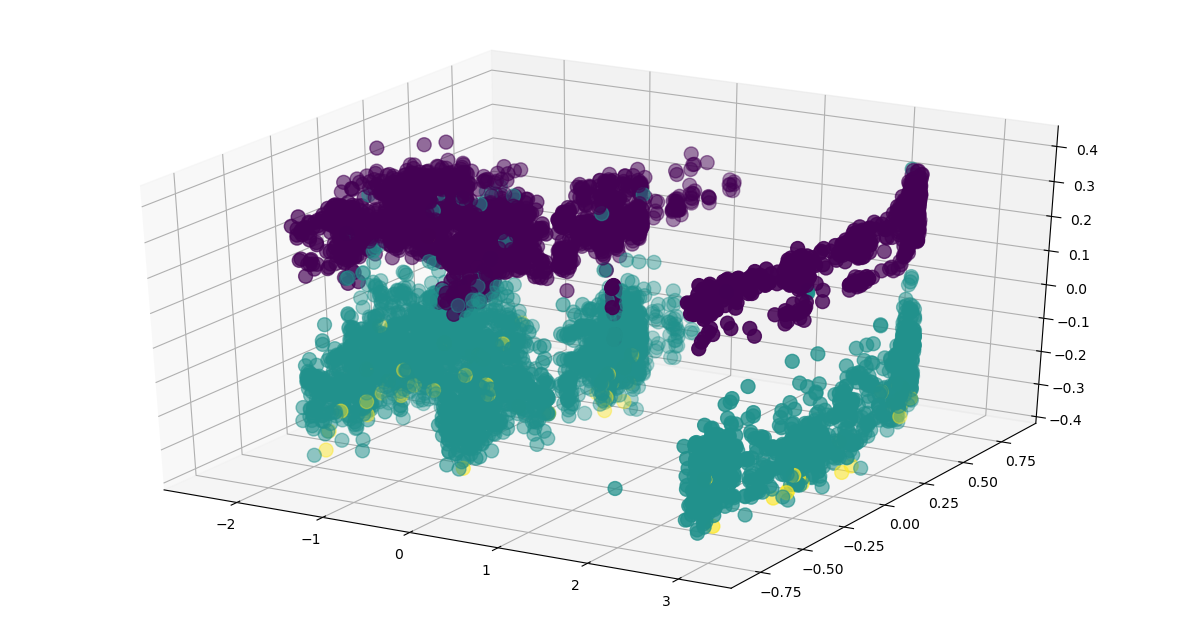

In [100]:
plt.figure(figsize=(15,8))
ax = plt.axes(projection='3d')
ax.scatter3D(X_pca.iloc[:,0], X_pca.iloc[:,1], X_pca.iloc[:,2] ,c=df_clean['class'].map({'STAR':0,'GALAXY':1,'QSO':2}),s=100)